In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

#ignore all warnings
import warnings
warnings.filterwarnings(action= 'ignore')

#set some parameters
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'
mpl.rcParams['figure.figsize'] = [16,9]

In [2]:
# #connecting to drive
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df.head()

date     value
0 1991-07-01  3.526591
1 1991-08-01  3.180891
2 1991-09-01  3.252221
3 1991-10-01  3.611003
4 1991-11-01  3.565869

In [4]:
df['date'].min(), df['date'].max()

(Timestamp('1991-07-01 00:00:00'), Timestamp('2008-06-01 00:00:00'))

### Alternately, you can import it as a pandas Series with the date as index. You just need to specify the index_col argument in the pd.read_csv() to do this.

In [5]:
ser = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
ser.head()

value
date                
1991-07-01  3.526591
1991-08-01  3.180891
1991-09-01  3.252221
1991-10-01  3.611003
1991-11-01  3.565869

### What is panel data?

Panel data is also a time based dataset.

The difference is that, in addition to time series, it also contains one or more related variables that are measured for the same time periods.

Typically, the columns present in panel data contain explanatory variables that can be helpful in predicting the Y, provided those columns will be available at the future forecasting period.

An example of panel data is shown below

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/MarketArrivals.csv')
df = df.loc[df.market=='MUMBAI', :]
df.head()

market    month  year  quantity  priceMin  priceMax  priceMod state  \
6654  MUMBAI  January  2004    267100       719       971       849    MS   
6655  MUMBAI  January  2005    275845       261       513       387    MS   
6656  MUMBAI  January  2006    228000       315       488       402    MS   
6657  MUMBAI  January  2007    205200       866      1136       997    MS   
6658  MUMBAI  January  2008    267550       348       550       448    MS   

        city          date  
6654  MUMBAI  January-2004  
6655  MUMBAI  January-2005  
6656  MUMBAI  January-2006  
6657  MUMBAI  January-2007  
6658  MUMBAI  January-2008

### Visualizing a time series

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.head()

value
date                
1991-07-01  3.526591
1991-08-01  3.180891
1991-09-01  3.252221
1991-10-01  3.611003
1991-11-01  3.565869

In [8]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

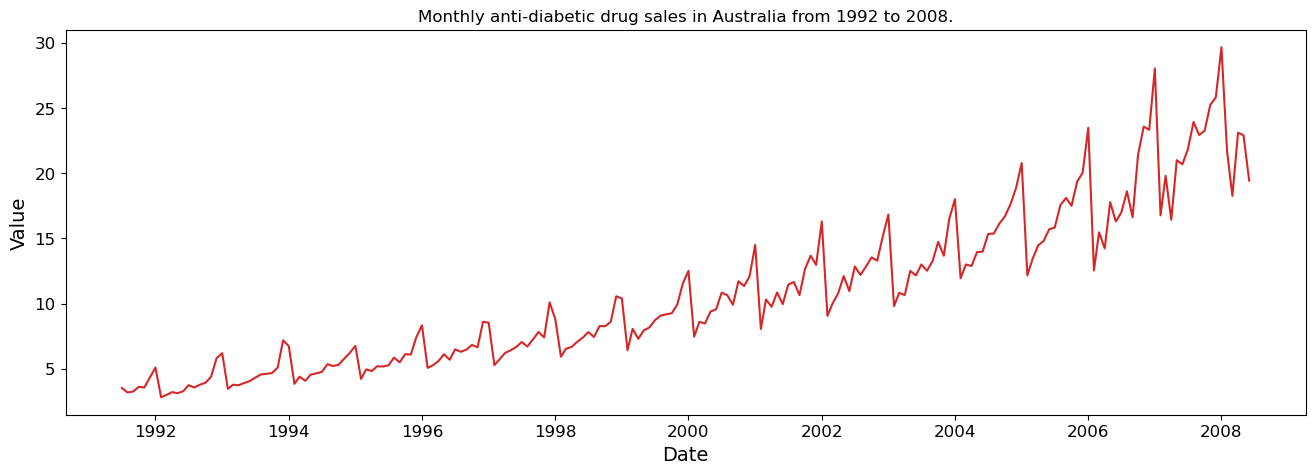

In [9]:
plot_df(df,
        x=df.index,
        y=df.value,
        title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')

### Since all values are positive, you can show this on both sides of the Y axis to emphasize the growth.

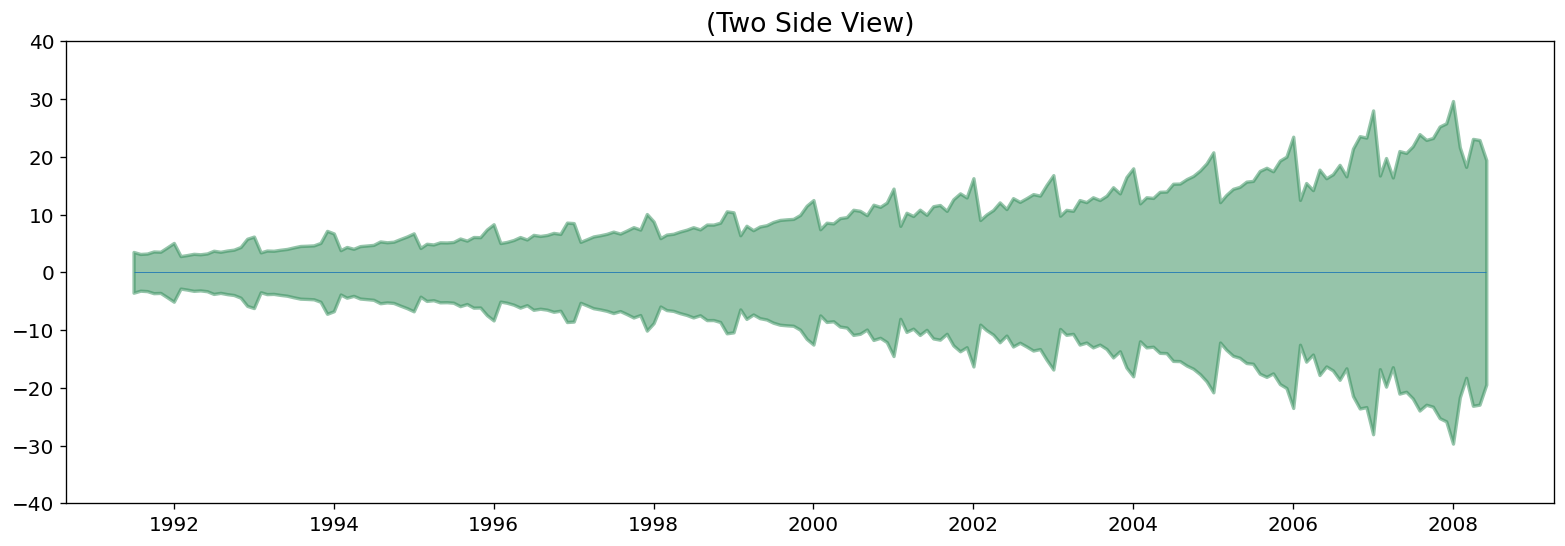

In [10]:
# Plot
x = df.index
y1 = df.value
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-40, 40)
plt.title('(Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.index), xmax=np.max(df.index), linewidth=.5)
plt.show()

### Since its a monthly time series and follows a certain repetitive pattern every year, you can plot each year as a separate line in the same plot. This lets you compare the year wise patterns side-by-side.

In [11]:
# Prepare data
df['year'] = [d.year for d in df.index]
df['month'] = [d.strftime('%b') for d in df.index]
years = df['year'].unique()

In [12]:
df

value  year month
date                             
1991-07-01   3.526591  1991   Jul
1991-08-01   3.180891  1991   Aug
1991-09-01   3.252221  1991   Sep
1991-10-01   3.611003  1991   Oct
1991-11-01   3.565869  1991   Nov
...               ...   ...   ...
2008-02-01  21.654285  2008   Feb
2008-03-01  18.264945  2008   Mar
2008-04-01  23.107677  2008   Apr
2008-05-01  22.912510  2008   May
2008-06-01  19.431740  2008   Jun

[204 rows x 3 columns]

In [13]:
years

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008], dtype=int64)

In [14]:
# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()),
                            len(years),
                            replace=False)

In [15]:
mycolors

array(['xkcd:vivid purple', 'xkcd:bright lavender', 'xkcd:sapphire',
       'xkcd:dark fuchsia', 'xkcd:dusky pink', 'xkcd:dusty purple',
       'xkcd:dark tan', 'xkcd:orange brown', 'xkcd:red orange',
       'xkcd:clear blue', 'xkcd:lemon', 'xkcd:bluish grey',
       'xkcd:dark blue grey', 'xkcd:pale violet', 'xkcd:orangey yellow',
       'xkcd:cool grey', 'xkcd:green', 'xkcd:ice'], dtype='<U31')

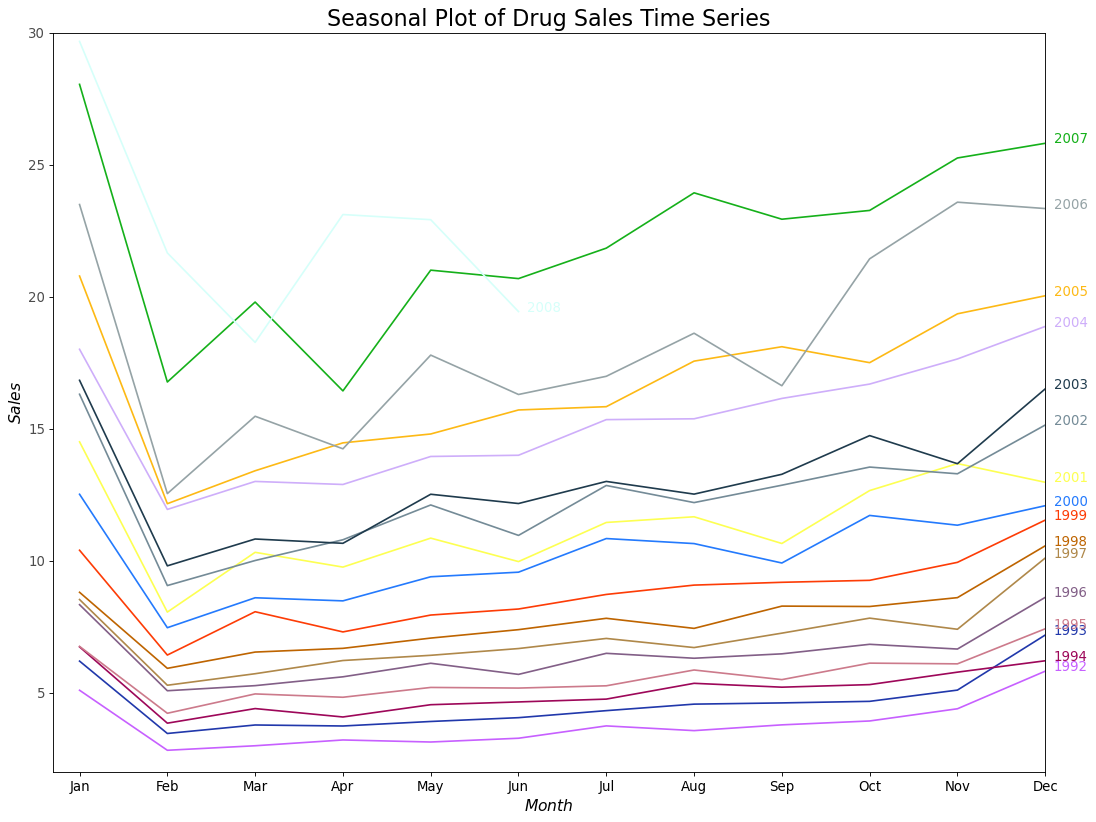

In [16]:
# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, 
                                                                                             color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

### Boxplot of Month-wise (Seasonal) and Year-wise (trend) Distribution

In [17]:
df

value  year month
date                             
1991-07-01   3.526591  1991   Jul
1991-08-01   3.180891  1991   Aug
1991-09-01   3.252221  1991   Sep
1991-10-01   3.611003  1991   Oct
1991-11-01   3.565869  1991   Nov
...               ...   ...   ...
2008-02-01  21.654285  2008   Feb
2008-03-01  18.264945  2008   Mar
2008-04-01  23.107677  2008   Apr
2008-05-01  22.912510  2008   May
2008-06-01  19.431740  2008   Jun

[204 rows x 3 columns]

In [18]:
years

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008], dtype=int64)

In [19]:
df.loc[~df.year.isin([1991, 2008]), :]

value  year month
date                             
1992-01-01   5.088335  1992   Jan
1992-02-01   2.814520  1992   Feb
1992-03-01   2.985811  1992   Mar
1992-04-01   3.204780  1992   Apr
1992-05-01   3.127578  1992   May
...               ...   ...   ...
2007-08-01  23.930204  2007   Aug
2007-09-01  22.930357  2007   Sep
2007-10-01  23.263340  2007   Oct
2007-11-01  25.250030  2007   Nov
2007-12-01  25.806090  2007   Dec

[192 rows x 3 columns]

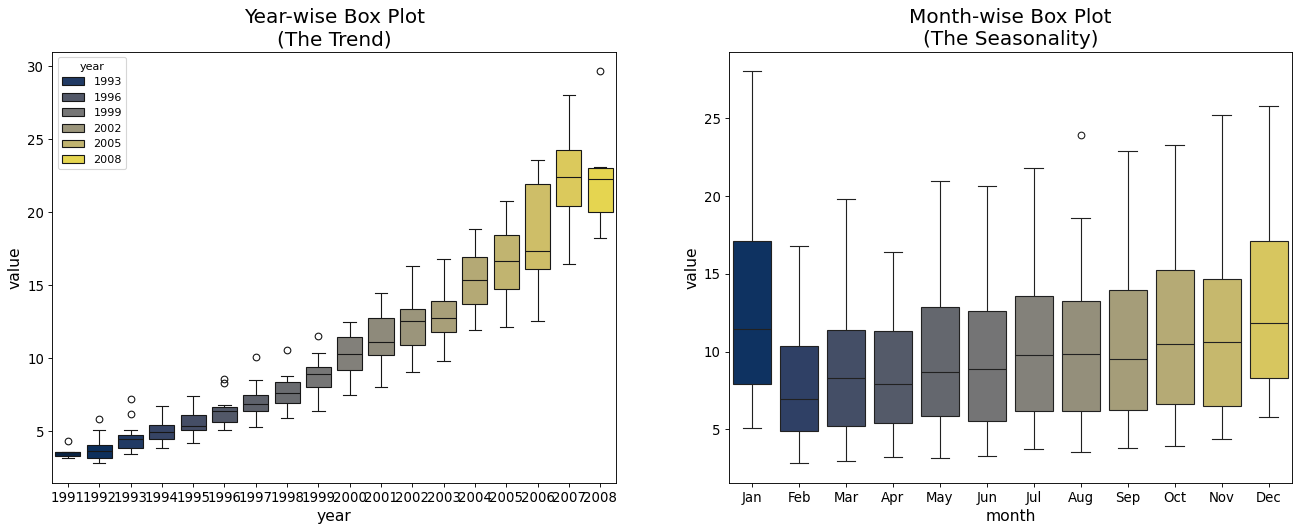

In [20]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0], hue='year', palette='cividis')
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :], ax=axes[1], hue='month',
                                                                                            palette='cividis')

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18);
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

### Patterns in a time series

Any time series may be split into the following components: Base Level + Trend + Seasonality + Error

A trend is observed when there is an increasing or decreasing slope observed in the time series. Whereas seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.

However, It is not mandatory that all time series must have a trend and/or seasonality. A time series may not have a distinct trend but have a seasonality. The opposite can also be true.

So, a time series may be imagined as a combination of the trend, seasonality and the error terms.

<Axes: title={'center': 'Trend and Seasonality'}, xlabel='date'>

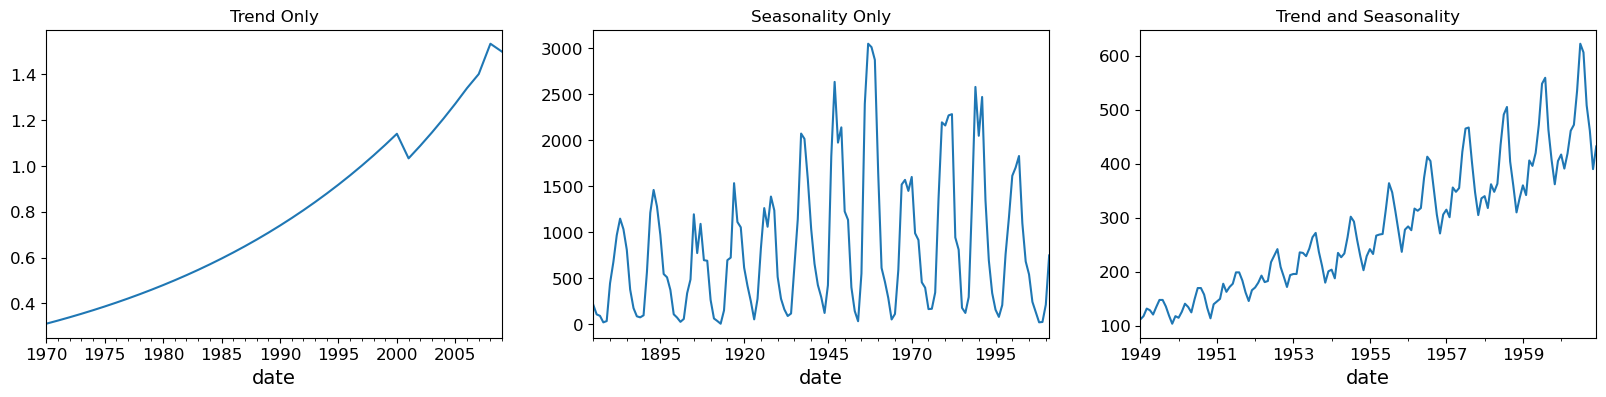

In [21]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv', parse_dates=['date'], 
                                                index_col='date').plot(title='Trend Only', legend=False, ax=axes[0])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv', parse_dates=['date'], 
                                            index_col='date').plot(title='Seasonality Only', legend=False, ax=axes[1])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', parse_dates=['date'], 
                                        index_col='date').plot(title='Trend and Seasonality', legend=False, ax=axes[2])

Another aspect to consider is the cyclic behaviour. It happens when the rise and fall pattern in the series does not happen in fixed calendar-based intervals. Care should be taken to not confuse ‘cyclic’ effect with ‘seasonal’ effect.

So, How to diffentiate between a ‘cyclic’ vs ‘seasonal’ pattern?

If the patterns are not of fixed calendar based frequencies, then it is cyclic. Because, unlike the seasonality, cyclic effects are typically influenced by the business and other socio-economic factors.

### Stationary and Non-Stationary Time Series

Stationarity is a property of a time series. A stationary series is one where the values of the series is not a function of time.

That is, the statistical properties of the series like mean, variance and autocorrelation are constant over time.

A stationary time series id devoid of seasonal effects as well.

So how to identify if a series is stationary or not? Let’s plot some examples to make it clear:

it is possible to make nearly any time series stationary by applying a suitable transformation. Most statistical forecasting methods are designed to work on a stationary time series. The first step in the forecasting process is typically to do some transformation to convert a non-stationary series to stationary

Forecasting a stationary series is relatively easy and the forecasts are more reliable.

An important reason is, autoregressive forecasting models are essentially linear regression models that utilize the lag(s) of the series itself as predictors.

We know that linear regression works best if the predictors (X variables) are not correlated against each other. So, stationarizing the series solves this problem since it removes any persistent autocorrelation, thereby making the predictors(lags of the series) in the forecasting models nearly independent.

### How to make a time series stationary?

You can make series stationary by:

Differencing the Series (once or more) Take the log of the series Take the nth root of the series Combination of the above The most common and convenient method to stationarize the series is by differencing the series at least once until it becomes approximately stationary.

So what is differencing?

If Y_t is the value at time ‘t’, then the first difference of Y = Yt – Yt-1. In simpler terms, differencing the series is nothing but subtracting the next value by the current value.

If the first difference doesn’t make a series stationary, you can go for the second differencing. And so on.

For example, consider the following series: [1, 5, 2, 12, 20]

First differencing gives: [5-1, 2-5, 12-2, 20-12] = [4, -3, 10, 8] Second differencing gives: [-3-4, -10-3, 8-10] = [-7, -13, -2]

### How to test for stationarity?

The stationarity of a series can be established by looking at the plot of the series

Another method is to split the series into 2 or more contiguous parts and computing the summary statistics like the mean, variance and the autocorrelation. If the stats are quite different, then the series is not likely to be stationary.

Nevertheless, you need a method to quantitatively determine if a given series is stationary or not. This can be done using statistical tests called ‘Unit Root Tests’. There are multiple variations of this, where the tests check if a time series is non-stationary and possess a unit root.

There are multiple implementations of Unit Root tests like:

Augmented Dickey Fuller test (ADH Test) Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary) Philips Perron test (PP Test) The most commonly used is the ADF test, where the null hypothesis is the time series possesses a unit root and is non-stationary. So, id the P-Value in ADH test is less than the significance level (0.05), you reject the null hypothesis. The KPSS test, on the other hand, is used to test for trend stationarity. The null hypothesis and the P-Value interpretation is just the opposite of ADH test. The below code implements these two tests using statsmodels package in python.

In [22]:
from statsmodels.tsa.stattools import adfuller, kpss

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df

date      value
0   1991-07-01   3.526591
1   1991-08-01   3.180891
2   1991-09-01   3.252221
3   1991-10-01   3.611003
4   1991-11-01   3.565869
..         ...        ...
199 2008-02-01  21.654285
200 2008-03-01  18.264945
201 2008-04-01  23.107677
202 2008-05-01  22.912510
203 2008-06-01  19.431740

[204 rows x 2 columns]

In [24]:
# ADF Test
result = adfuller(df.value.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 3.14518568930675
p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476


In [25]:
# KPSS Test
result = kpss(df.value.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 2.013126
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\dell\AppData\Local\Temp\ipykernel_8884\2682376914.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df.value.values, regression='c')


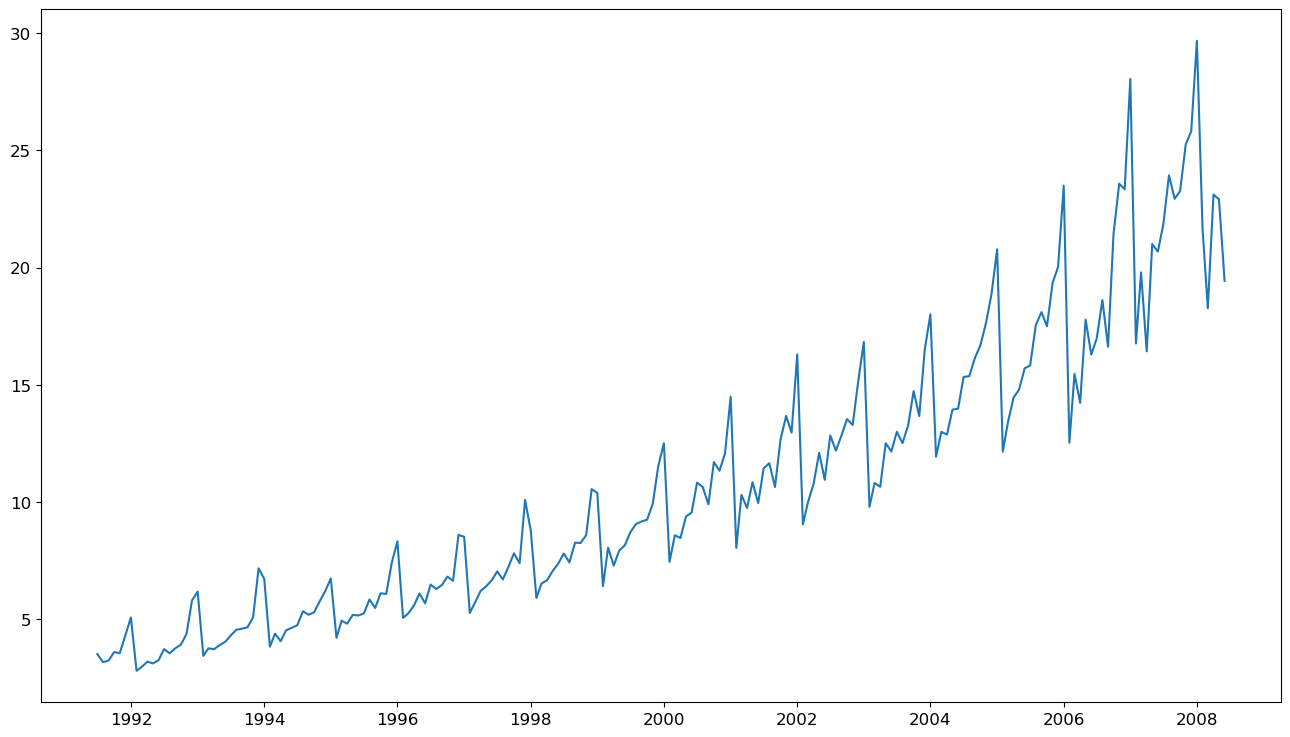

In [26]:
plt.figure(figsize=(16,9))
plt.plot(df.date, df.value)
plt.show()

## How to detrend a time series?

Detrending a time series is to remove the trend component from a time series. But how to extract the trend? There are multiple approaches.

- Subtract the line of best fit from the time series. The line of best fit may be obtained from a linear regression model with the time steps as the predictor. For more complex trends, you may want to use quadratic terms (x^2) in the model.

- Subtract the trend component obtained from time series decomposition we saw earlier.

- Subtract the mean

- Apply a filter like Baxter-King filter(statsmodels.tsa.filters.bkfilter) or the Hodrick-Prescott Filter (statsmodels.tsa.filters.hpfilter) to remove the moving average trend lines or the cyclical components.

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df

date      value
0   1991-07-01   3.526591
1   1991-08-01   3.180891
2   1991-09-01   3.252221
3   1991-10-01   3.611003
4   1991-11-01   3.565869
..         ...        ...
199 2008-02-01  21.654285
200 2008-03-01  18.264945
201 2008-04-01  23.107677
202 2008-05-01  22.912510
203 2008-06-01  19.431740

[204 rows x 2 columns]

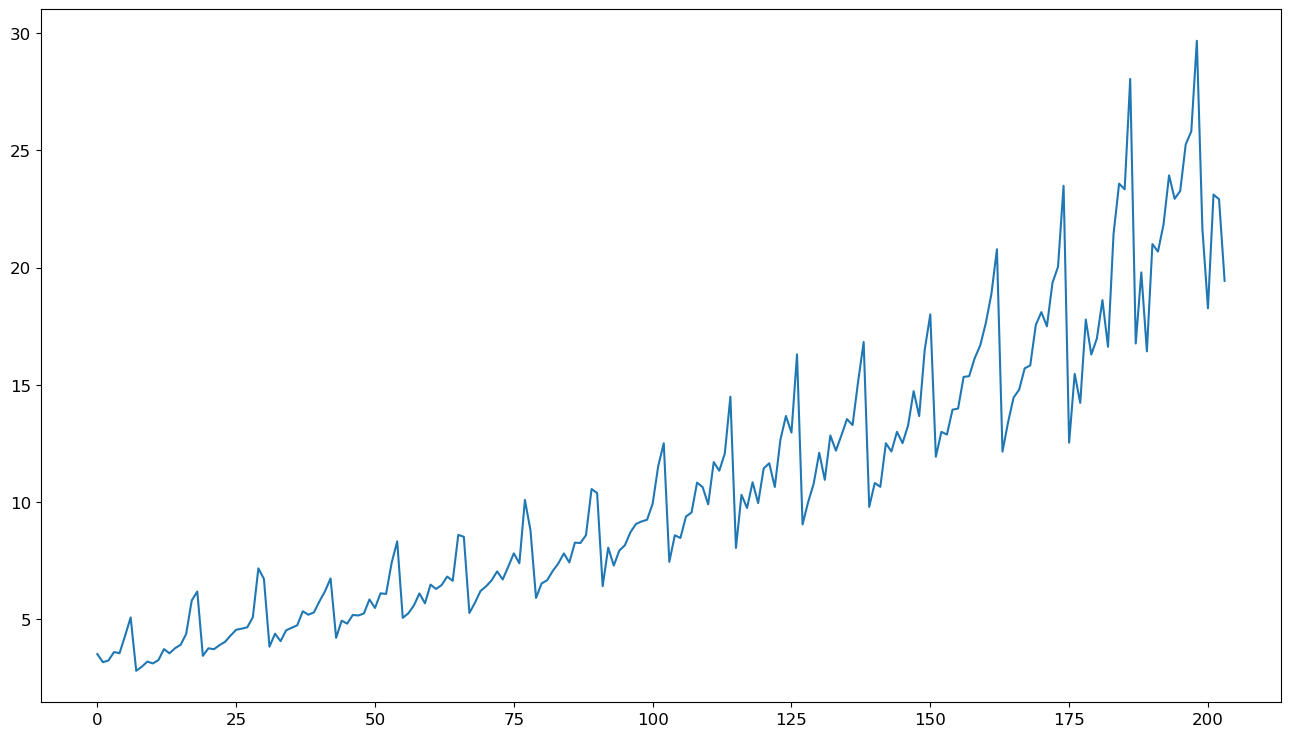

In [28]:
plt.figure(figsize=(16,9))
plt.plot(df.value)
plt.show()

### Detrend a time series

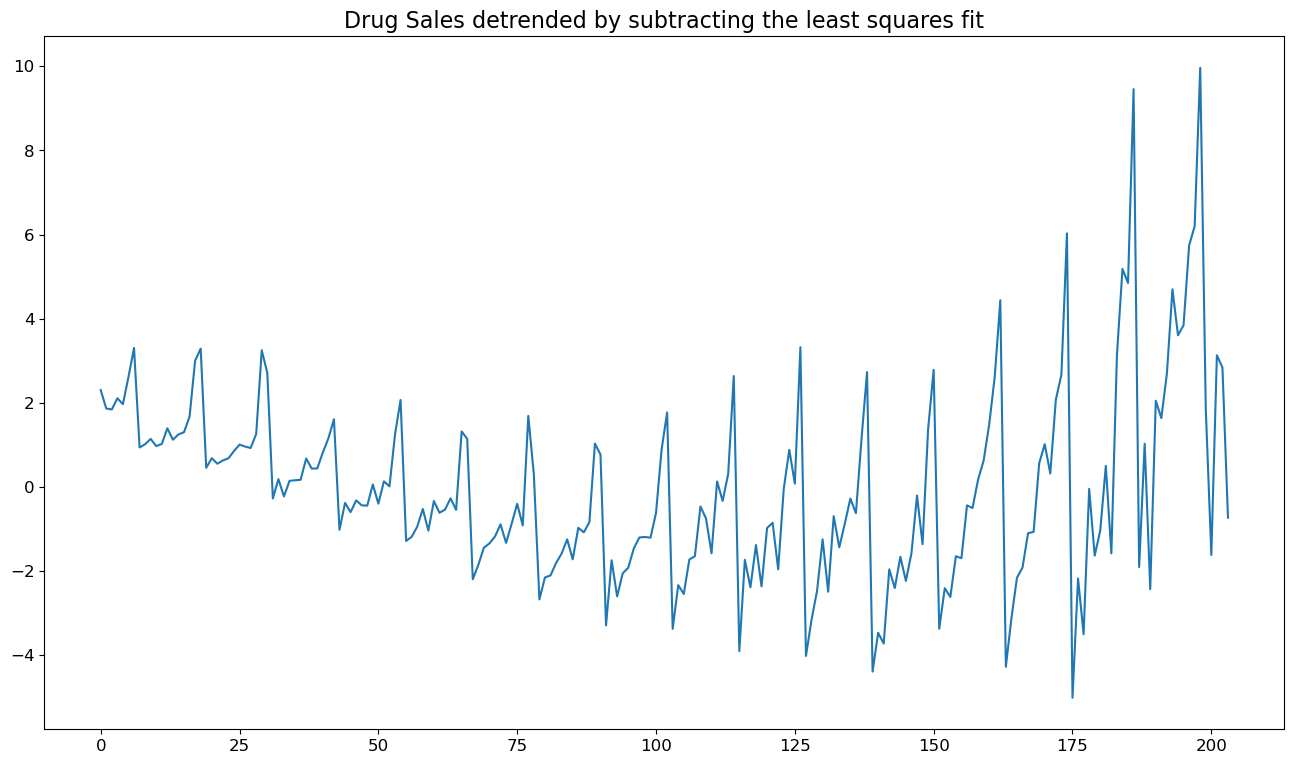

In [29]:
# Using scipy: Subtract the line of best fit
from scipy import signal

# Zaman seriyasının uzunmüddətli trendini çıxarır və qısa müddətli dəyişiklikləri saxlayır
detrended = signal.detrend(df.value.values)
plt.figure(figsize=(16,9))
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the least squares fit', fontsize=16)
plt.show()

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], 
                                                                                             index_col='date')
df

value
date                 
1991-07-01   3.526591
1991-08-01   3.180891
1991-09-01   3.252221
1991-10-01   3.611003
1991-11-01   3.565869
...               ...
2008-02-01  21.654285
2008-03-01  18.264945
2008-04-01  23.107677
2008-05-01  22.912510
2008-06-01  19.431740

[204 rows x 1 columns]

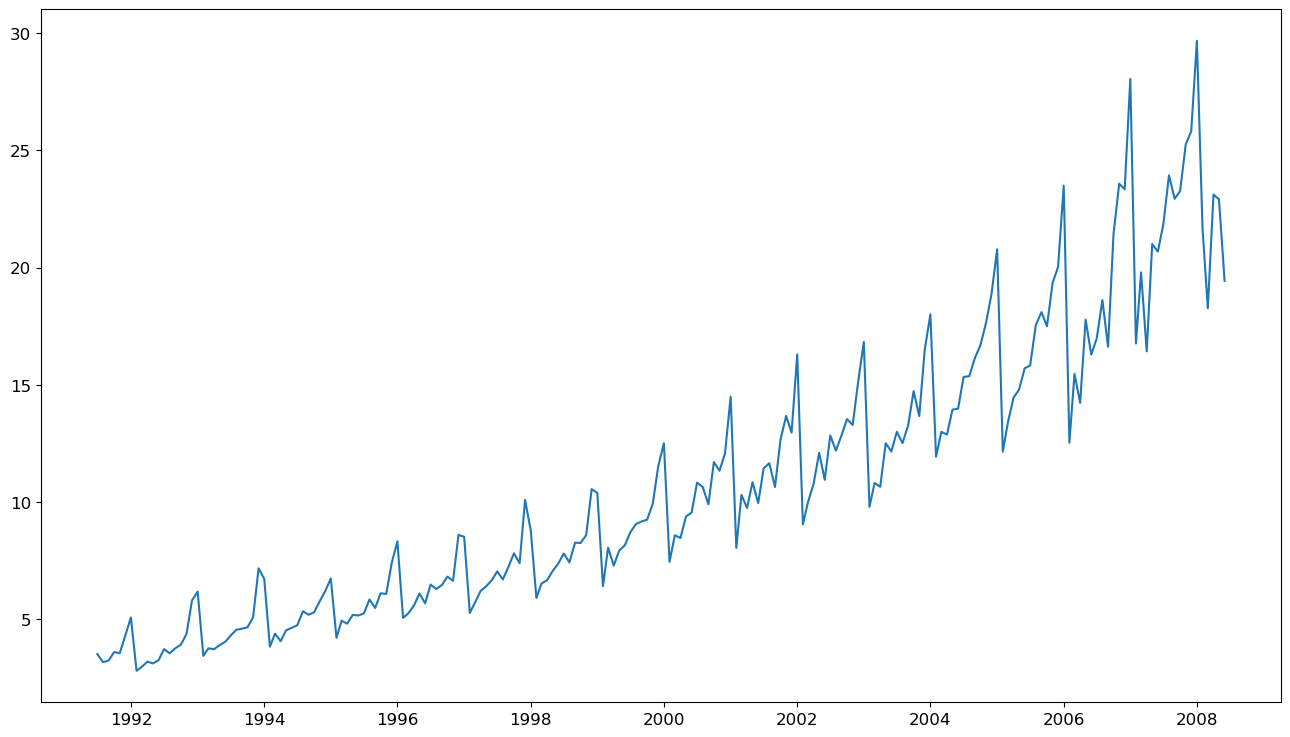

In [31]:
plt.figure(figsize=(16,9))
plt.plot(df.value)
plt.show()

### Detrend a time series

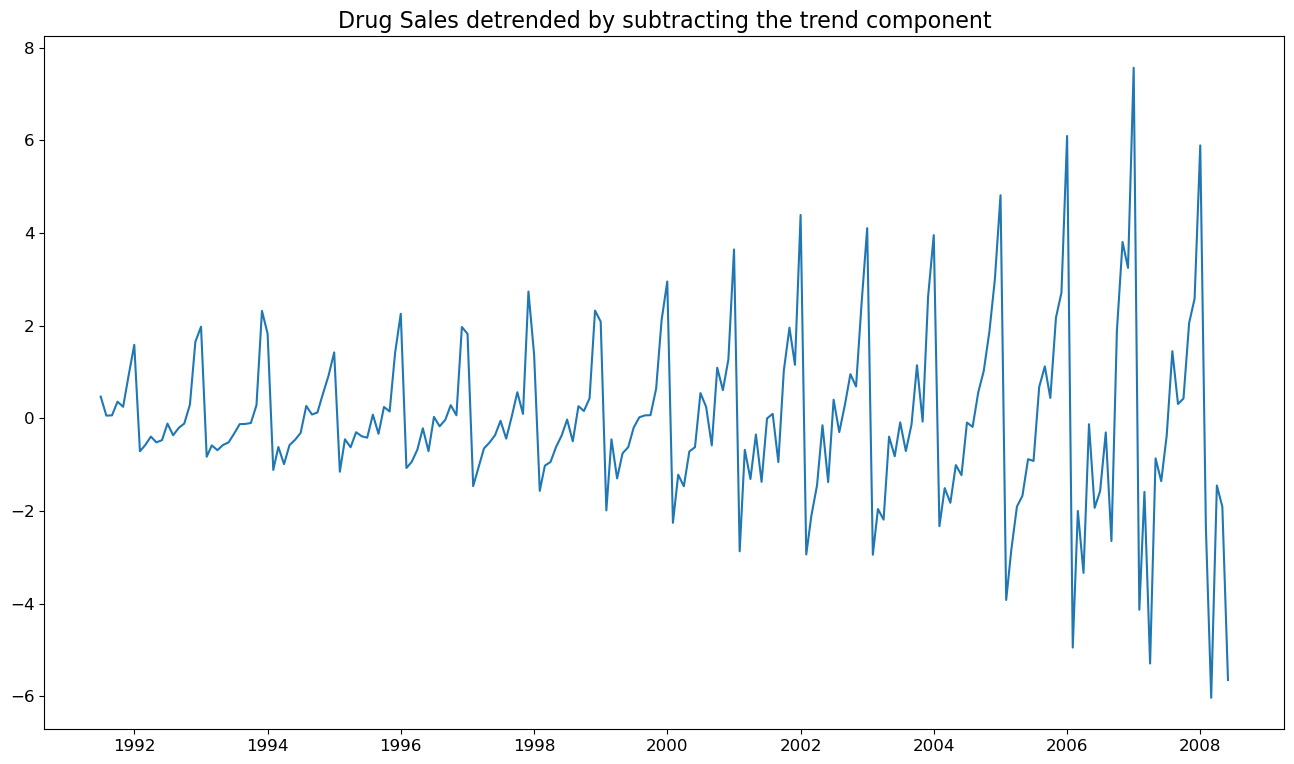

In [32]:
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose

# Zaman seriyasını mövsümi (seasonal), trend və təsadüfi (residual) komponentlərə ayırır.
# 'multiplicative' model istifadə olunur ki, bu da seriyadakı dəyişikliklərin nisbətən mövsümi təsirlərdən 
#                                                                                     asılı olduğunu nəzərdə tutur.
# 'extrapolate_trend' = 'freq' trendin son qiymətlərinin proqnozlaşdırılması üçün istifadə olunur.
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# 16x9 ölçüsündə yeni qrafik sahəsi yaradır.
plt.figure(figsize=(16,9))

# Zaman seriyasından trend komponentini çıxararaq detrend olunmuş dəyərləri əldə edir.
detrended = df.value.values - result_mul.trend

plt.plot(detrended) # Detrend olunmuş zaman seriyasını qrafikdə çəkir.

# Qrafik üçün başlıq təyin edir və şrift ölçüsünü 16 edir, mətn trendin çıxarıldığını göstərir.
plt.title('Drug Sales detrended by subtracting the trend component', fontsize=16)

plt.show() # Qrafiki göstərir.

## How to deseasonalize a time series?

There are multiple approaches to deseasonalize a time series as well. Below are a few:

-  Take a moving average with length as the seasonal window. This will smoothen in series in the process.

-  Seasonal difference the series (subtract the value of previous season from the current value)

-  Divide the series by the seasonal index obtained from STL decomposition

If dividing by the seasonal index does not work well, try taking a log of the series and then do the deseasonalizing. You can later restore to the original scale by taking an exponential.

In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], 
                                                                                                 index_col='date')
df

value
date                 
1991-07-01   3.526591
1991-08-01   3.180891
1991-09-01   3.252221
1991-10-01   3.611003
1991-11-01   3.565869
...               ...
2008-02-01  21.654285
2008-03-01  18.264945
2008-04-01  23.107677
2008-05-01  22.912510
2008-06-01  19.431740

[204 rows x 1 columns]

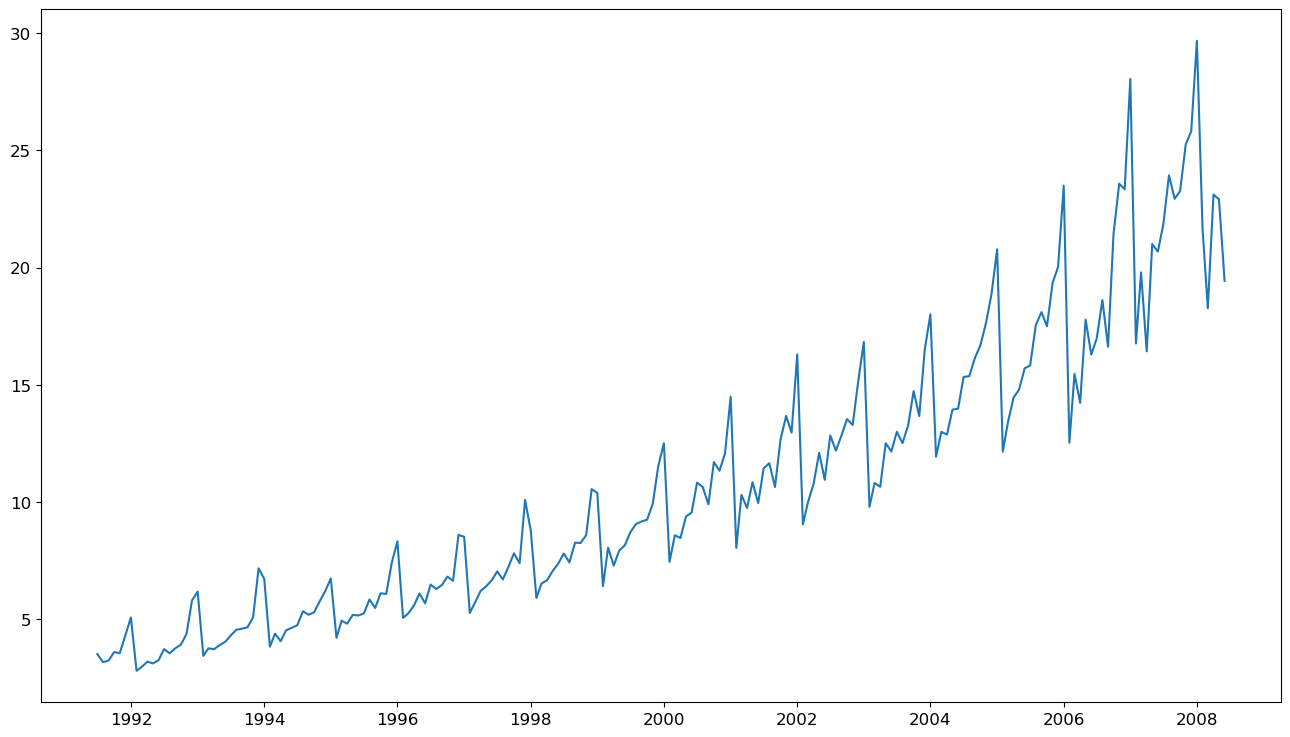

In [34]:
plt.figure(figsize=(16,9))
plt.plot(df.value)
plt.show()

### Deseasonalize a time series

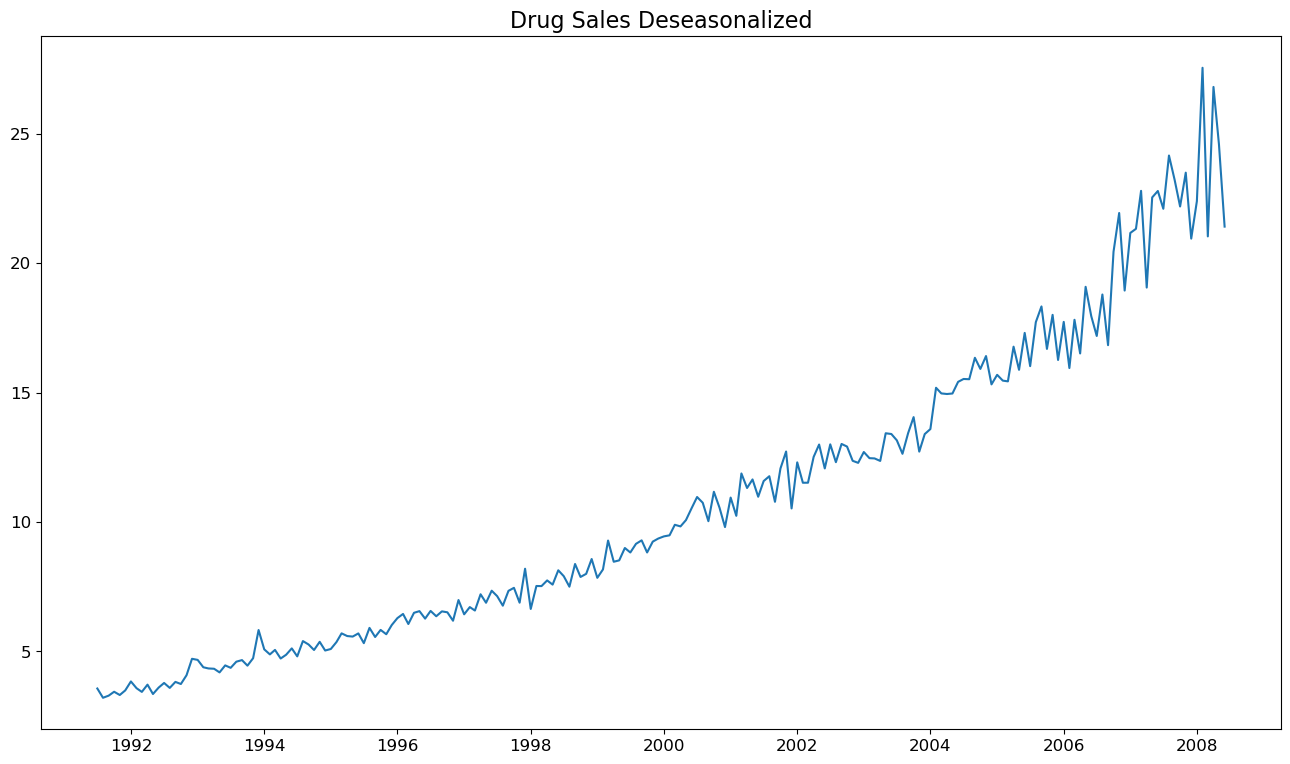

In [35]:
# Vaxt seriyasını multiplicative modelinə əsasən parçalama (trend, seasonality və residualları çıxarmaq)
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Sezonallığı aradan qaldırmaq (Deseasonalize etmək) üçün orijinal dəyərləri seasonality komponentinə bölmək
deseasonalized = df.value.values / result_mul.seasonal

# Çıxarılmış seasonality-dən sonra qrafiki vizuallaşdırmaq üçün pəncərə ölçüsünü təyin edir
plt.figure(figsize=(16,9))

# Deseasonalized vaxt seriyasını çəkir
plt.plot(deseasonalized)

# Qrafikin başlığını təyin edir
plt.title('Drug Sales Deseasonalized', fontsize=16)

# Qrafiki göstərir
plt.plot()

# Final olaraq qrafiki ekranda göstərir
plt.show()


## How to test for seasonality of a time series

The common way is to plot the series and check for repeatable patterns in fixed time intervals. So, the types of seasonality is determined by the clock or the calendar:

- Hour of day
- Day of month
- Weekly
- Monthly
- Yearly

However, if you want a more definitive inspection of the seasonality, use the Autocorrelation Function (ACF) plot. When there is a strong seasonal pattern, the ACF plot usually reveals definitive repeated spikes at the multiples of the seasonal window.
For example, the drug sales time series is a monthly series with patterns repeating every year. So, you can see spikes at 12th, 24th, 36th.. lines.

I must caution you that in real word datasets such strong patterns is hardly noticed and can get distorted by any noise, so you need a careful eye to capture these patterns.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

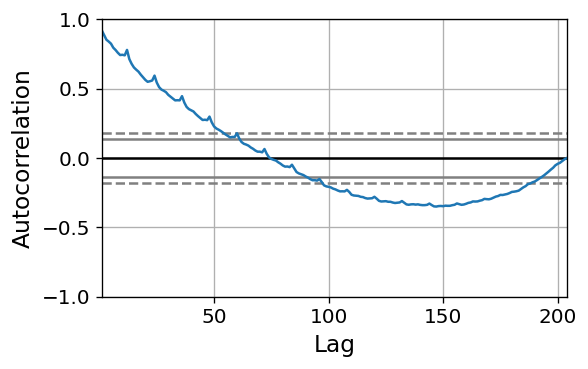

In [36]:
# Pandas-dan autocorrelation plot funksiyasını istifadə etmək üçün import edir
from pandas.plotting import autocorrelation_plot

# Qrafikin ölçüsünü və DPI (çözünürlüyünü) təyin edir
plt.rcParams.update({'figure.figsize': (5, 3), 'figure.dpi': 120})

# Autokorrelyasiya qrafikini çəkir (df.value sütununu liste çevirərək daxil edir)
autocorrelation_plot(df.value.tolist())

Alternately, if you want a statistical test, the CHTest can determine if seasonal differencing is required to stationarize the series.

How to treat missing values in a time series?

## Null value fill

<Axes: title={'center': 'Seasonal Mean (MSE: 0.78)'}, xlabel='date'>

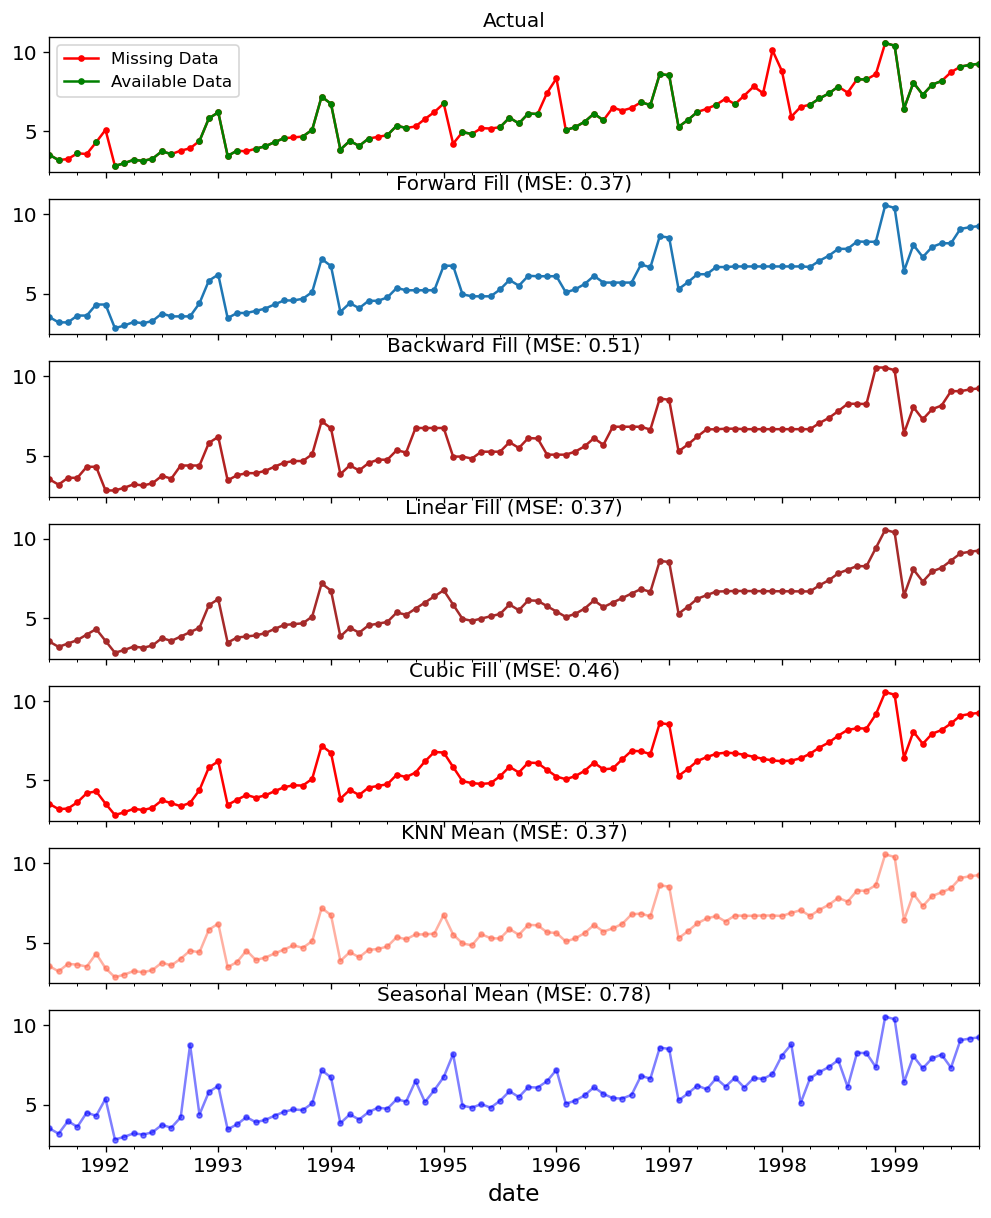

In [37]:
# # Generate dataset
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
df_orig = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], 
                                                                                      index_col='date').head(100)
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10_missings.csv', parse_dates=['date'], 
                                                                                                index_col='date')

fig, axes = plt.subplots(7, 1, sharex=True, figsize=(10, 12))
plt.rcParams.update({'xtick.bottom' : False})

## 1. Actual -------------------------------
df_orig.plot(title='Actual', ax=axes[0], label='Actual', color='red', style=".-")
df.plot(title='Actual', ax=axes[0], label='Actual', color='green', style=".-")
axes[0].legend(["Missing Data", "Available Data"])

## 2. Forward Fill --------------------------
df_ffill = df.ffill()
error = np.round(mean_squared_error(df_orig['value'], df_ffill['value']), 2)
df_ffill['value'].plot(title='Forward Fill (MSE: ' + str(error) +")", ax=axes[1], label='Forward Fill', style=".-")

## 3. Backward Fill -------------------------
df_bfill = df.bfill()
error = np.round(mean_squared_error(df_orig['value'], df_bfill['value']), 2)
df_bfill['value'].plot(title="Backward Fill (MSE: " + str(error) +")", ax=axes[2], label='Back Fill', 
                                                                                   color='firebrick', style=".-")

## 4. Linear Interpolation ------------------
df['rownum'] = np.arange(df.shape[0])
df_nona = df.dropna(subset = ['value'])
f = interp1d(df_nona['rownum'], df_nona['value'])
df['linear_fill'] = f(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['linear_fill']), 2)
df['linear_fill'].plot(title="Linear Fill (MSE: " + str(error) +")", ax=axes[3], label='Cubic Fill', 
                                                                                       color='brown', style=".-")

## 5. Cubic Interpolation --------------------
f2 = interp1d(df_nona['rownum'], df_nona['value'], kind='cubic')
df['cubic_fill'] = f2(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['cubic_fill']), 2)
df['cubic_fill'].plot(title="Cubic Fill (MSE: " + str(error) +")", ax=axes[4], label='Cubic Fill', color='red', 
                                                                                                      style=".-")

# Interpolation References:
# https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
# https://docs.scipy.org/doc/scipy/reference/interpolate.html

## 6. Mean of 'n' Nearest Past Neighbors ------
def knn_mean(ts, n):
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            n_by_2 = np.ceil(n/2)
            lower = np.max([0, int(i-n_by_2)])
            upper = np.min([len(ts)+1, int(i+n_by_2)])
            ts_near = np.concatenate([ts[lower:i], ts[i:upper]])
            out[i] = np.nanmean(ts_near)
    return out

df['knn_mean'] = knn_mean(df.value.values, 8)
error = np.round(mean_squared_error(df_orig['value'], df['knn_mean']), 2)
df['knn_mean'].plot(title="KNN Mean (MSE: " + str(error) +")", ax=axes[5], label='KNN Mean', color='tomato', 
                                                                                            alpha=0.5, style=".-")

## 7. Seasonal Mean ----------------------------
def seasonal_mean(ts, n, lr=0.7):
    """
    Compute the mean of corresponding seasonal periods
    ts: 1D array-like of the time series
    n: Seasonal window length of the time series
    """
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            ts_seas = ts[i-1::-n]  # previous seasons only
            if np.isnan(np.nanmean(ts_seas)):
                ts_seas = np.concatenate([ts[i-1::-n], ts[i::n]])  # previous and forward
            out[i] = np.nanmean(ts_seas) * lr
    return out

df['seasonal_mean'] = seasonal_mean(df.value, n=12, lr=1.25)
error = np.round(mean_squared_error(df_orig['value'], df['seasonal_mean']), 2)
df['seasonal_mean'].plot(title="Seasonal Mean (MSE: " + str(error) +")", ax=axes[6], label='Seasonal Mean', 
                                                                             color='blue', alpha=0.5, style=".-")

- If you have explanatory variables use a prediction model like the random forest or k-Nearest Neighbors to predict it.
- If you have enough past observations, forecast the missing values.
- If you have enough future observations, backcast the missing values
- Forecast of counterparts from previous cycles.

<Axes: title={'center': 'Seasonal Mean (MSE: 0.78)'}, xlabel='date'>

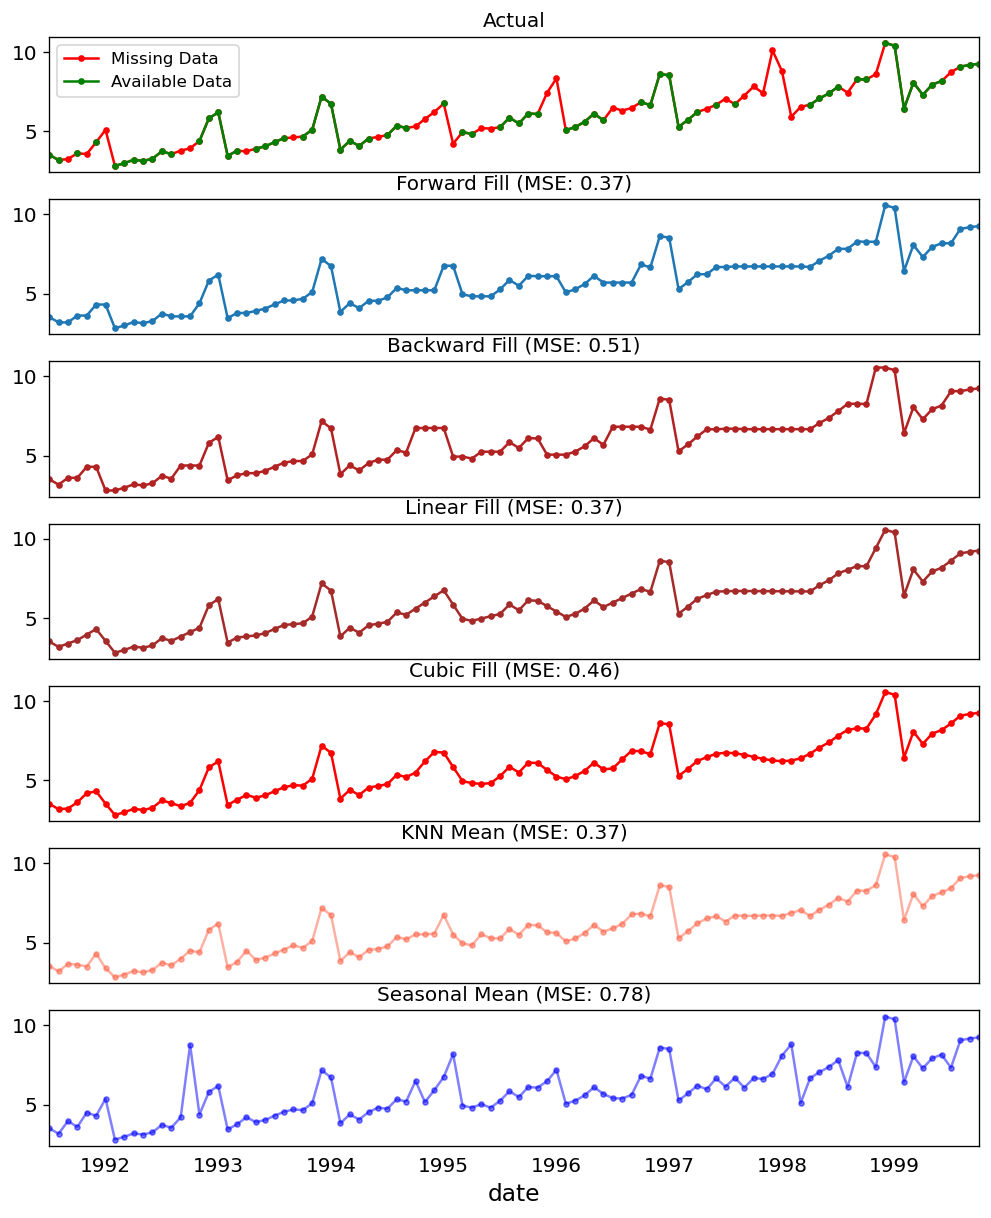

In [38]:
# Lazımi kitabxanaları yükləyir
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error

# Orijinal datasetin ilk 100 sətirini yükləyir
df_orig = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], 
                                                                                      index_col='date').head(100)

# Əksik məlumat olan datasetin yüklənməsi
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10_missings.csv', 
                                                                            parse_dates=['date'], index_col='date')

# 7 qrafikli bir pəncərə (subplot) yaradır
fig, axes = plt.subplots(7, 1, sharex=True, figsize=(10, 12))

# Qrafikin ölçüləri və DPI (çözünürlüyünü) tənzimləyir
plt.rcParams.update({'xtick.bottom' : False})

## 1. Faktiki dəyərlər -------------------------------
# Orijinal datasetin qrafikini çəkir
df_orig.plot(title='Actual', ax=axes[0], label='Actual', color='red', style=".-")

# Əksik məlumat olan datasetin qrafikini çəkir
df.plot(title='Actual', ax=axes[0], label='Actual', color='green', style=".-")

# Qrafik üçün əfsanə (legend) əlavə edir
axes[0].legend(["Missing Data", "Available Data"])

## 2. İrəli Dolğu (Forward Fill) --------------------------
# İrəli doğru məlumatları doldurur (ffill)
df_ffill = df.ffill()

# Orijinal dəyərlərlə irəli doldurulmuş dəyərlər arasında ortalama kvadrat xətanı (MSE) hesablayır
error = np.round(mean_squared_error(df_orig['value'], df_ffill['value']), 2)

# İrəli doldurulmuş qrafiki çəkir və MSE dəyərini başlıqda göstərir
df_ffill['value'].plot(title='Forward Fill (MSE: ' + str(error) +")", ax=axes[1], label='Forward Fill', style=".-")

## 3. Geri Dolğu (Backward Fill) -------------------------
# Geri doğru məlumatları doldurur (bfill)
df_bfill = df.bfill()

# Orijinal dəyərlərlə geri doldurulmuş dəyərlər arasında ortalama kvadrat xətanı (MSE) hesablayır
error = np.round(mean_squared_error(df_orig['value'], df_bfill['value']), 2)

# Geri doldurulmuş qrafiki çəkir və MSE dəyərini başlıqda göstərir
df_bfill['value'].plot(title="Backward Fill (MSE: " + str(error) +")", ax=axes[2], label='Back Fill', 
                                                                               color='firebrick', style=".-")

## 4. Xətti İnterpolasiya (Linear Interpolation) ------------------
# Sətir nömrələrini yeni sütuna əlavə edir
df['rownum'] = np.arange(df.shape[0])

# Boş olmayan dəyərləri saxlayır
df_nona = df.dropna(subset = ['value'])

# Xətti interpolasiya üçün funksiyanı yaradır
f = interp1d(df_nona['rownum'], df_nona['value'])

# Xətti interpolasiya ilə dəyərləri doldurur
df['linear_fill'] = f(df['rownum'])

# Orijinal dəyərlərlə xətti doldurulmuş dəyərlər arasında ortalama kvadrat xətanı (MSE) hesablayır
error = np.round(mean_squared_error(df_orig['value'], df['linear_fill']), 2)

# Xətti interpolasiya qrafikini çəkir və MSE dəyərini başlıqda göstərir
df['linear_fill'].plot(title="Linear Fill (MSE: " + str(error) +")", ax=axes[3], label='Cubic Fill', color='brown', 
                                                                                                        style=".-")

## 5. Kub İnterpolasiya (Cubic Interpolation) --------------------
# Kub interpolasiya üçün funksiyanı yaradır
f2 = interp1d(df_nona['rownum'], df_nona['value'], kind='cubic')

# Kub interpolasiya ilə dəyərləri doldurur
df['cubic_fill'] = f2(df['rownum'])

# Orijinal dəyərlərlə kub interpolasiya dəyərləri arasında ortalama kvadrat xətanı (MSE) hesablayır
error = np.round(mean_squared_error(df_orig['value'], df['cubic_fill']), 2)

# Kub interpolasiya qrafikini çəkir və MSE dəyərini başlıqda göstərir
df['cubic_fill'].plot(title="Cubic Fill (MSE: " + str(error) +")", ax=axes[4], label='Cubic Fill', color='red', 
                                                                                                      style=".-")

# İnterpolasiya üçün mənbələr
# https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
# https://docs.scipy.org/doc/scipy/reference/interpolate.html

## 6. Yaxın Keçmiş Qonşuların Ortalaması (Mean of 'n' Nearest Past Neighbors) ------
# K Nearest Neighbors (KNN) ortalaması ilə məlumatları doldurur
def knn_mean(ts, n):
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            n_by_2 = np.ceil(n/2)
            lower = np.max([0, int(i-n_by_2)])
            upper = np.min([len(ts)+1, int(i+n_by_2)])
            ts_near = np.concatenate([ts[lower:i], ts[i:upper]])
            out[i] = np.nanmean(ts_near)
    return out

# KNN ortalaması ilə doldurulmuş dəyərləri yaradır
df['knn_mean'] = knn_mean(df.value.values, 8)

# Orijinal dəyərlərlə KNN ortalaması arasında ortalama kvadrat xətanı (MSE) hesablayır
error = np.round(mean_squared_error(df_orig['value'], df['knn_mean']), 2)

# KNN ortalaması qrafikini çəkir və MSE dəyərini başlıqda göstərir
df['knn_mean'].plot(title="KNN Mean (MSE: " + str(error) +")", ax=axes[5], label='KNN Mean', color='tomato', 
                                                                                            alpha=0.5, style=".-")

## 7. Mövsümi Ortalama (Seasonal Mean) ----------------------------
# Mövsümi ortalama ilə dəyərləri doldurur
def seasonal_mean(ts, n, lr=0.7):
    """
    Müvafiq mövsümi dövrlərin ortalamasını hesablayır
    ts: 1D array formasında zaman seriyası
    n: Mövsümi pəncərə uzunluğu (seasonal window length)
    """
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            ts_seas = ts[i-1::-n]  # yalnız əvvəlki mövsümləri götürür
            if np.isnan(np.nanmean(ts_seas)):
                ts_seas = np.concatenate([ts[i-1::-n], ts[i::n]])  # həm əvvəlki, həm də irəli mövsümlər
            out[i] = np.nanmean(ts_seas) * lr
    return out

# Mövsümi ortalama ilə doldurulmuş dəyərləri yaradır
df['seasonal_mean'] = seasonal_mean(df.value, n=12, lr=1.25)

# Orijinal dəyərlərlə mövsümi ortalama arasında ortalama kvadrat xətanı (MSE) hesablayır
error = np.round(mean_squared_error(df_orig['value'], df['seasonal_mean']), 2)

# Mövsümi ortalama qrafikini çəkir və MSE dəyərini başlıqda göstərir
df['seasonal_mean'].plot(title="Seasonal Mean (MSE: " + str(error) +")", ax=axes[6], label='Seasonal Mean', 
                                                                                 color='blue', alpha=0.5, style=".-")


## What is autocorrelation and partial autocorrelation functions?

Autocorrelation is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.

Partial Autocorrelation also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.

### Autocorrelation and Partial Autocorrelation

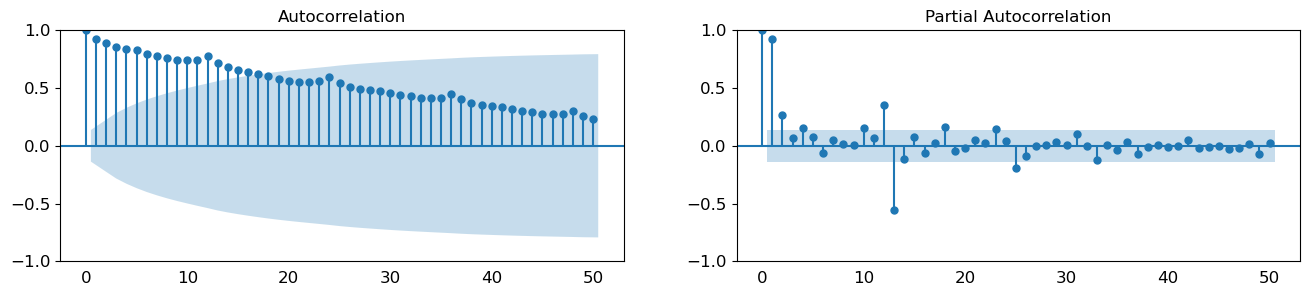

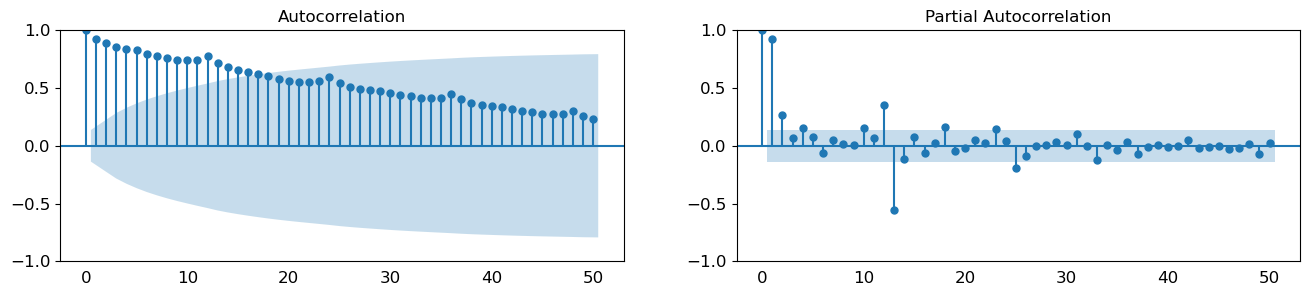

In [39]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Dataseti yükləyirik
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# 50 gecikməyə qədər ACF və PACF hesablanır - hazırda şərhə alınıb
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# ACF və PACF qrafiklərini çəkmək üçün 1x2 ölçülü subplot yaradırıq
fig, axes = plt.subplots(1, 2, figsize=(16, 3), dpi=100)

# Məlumatın ACF qrafiki çəkilir, 50 gecikməyə qədər
# tolist() metodu, Pandas DataFrame və ya Series-dən bir Python listi yaratmaq üçün istifadə olunur
plot_acf(df.value.tolist(), lags=50, ax=axes[0])

# Məlumatın PACF qrafiki çəkilir, 50 gecikməyə qədər
# tolist() metodu, Pandas DataFrame və ya Series-dən bir Python listi yaratmaq üçün istifadə olunur
plot_pacf(df.value.tolist(), lags=50, ax=axes[1])


## Lag Plots

A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series like the one you see below, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

### Lag

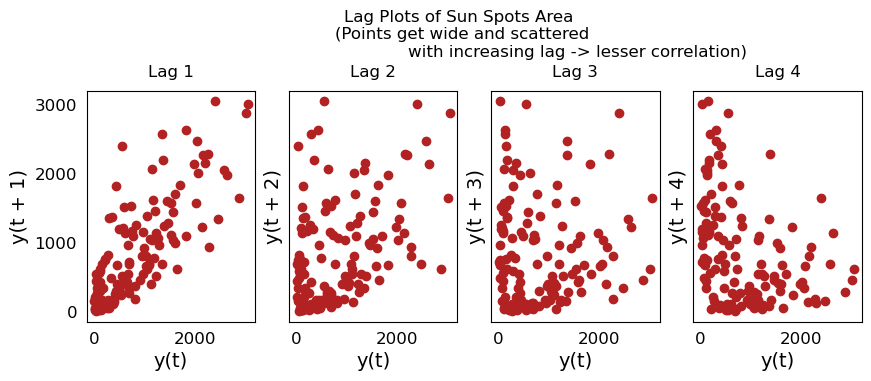

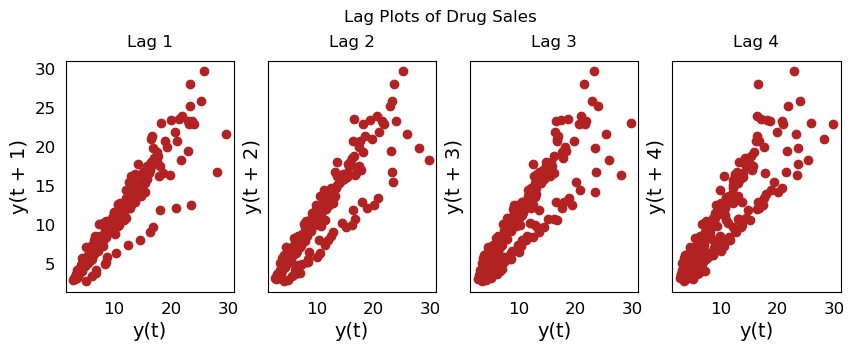

In [40]:
# 'lag_plot' funksiyasını idxal edir.
from pandas.plotting import lag_plot

# Matplotlib-dəki bəzi parametrləri yeniləyir, y-tiklərinin solda görünməsini ləğv edir və başlıqlar arasındakı 
#                                                                                            boşluğu tənzimləyir.
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Günəş ləkələri ilə bağlı məlumatları yükləyir.
ss = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv')

# A10 satışları ilə bağlı məlumatları yükləyir.
a10 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# Günəş ləkələrinin lag plotunu çəkmək
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)

# Hər bir ax üçün lag plot yaradır; lag dəyəri 'i+1' ilə artır.
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(ss.value, lag=i+1, ax=ax, c='firebrick')

    # Hər subplot üçün başlıq təyin edir.
    ax.set_title('Lag ' + str(i+1))

# Ümumi başlıq əlavə edir.
fig.suptitle('''Lag Plots of Sun Spots Area \n(Points get wide and scattered
                                            with increasing lag -> lesser correlation)\n''', y=1.15)

# A10 satışları üçün lag plotunu çəkmək
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)

# A10 satışları üçün lag plot yaradır.
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(a10.value, lag=i+1, ax=ax, c='firebrick')

    # Hər subplot üçün başlıq təyin edir.
    ax.set_title('Lag ' + str(i+1))

# Ümumi başlıq əlavə edir.
fig.suptitle('Lag Plots of Drug Sales', y=1.05)

# Qrafikləri göstərir.
plt.show()

## Why and How to smoothen a time series?

Smoothening of a time series may be useful in:

Reducing the effect of noise in a signal get a fair approximation of the noise-filtered series. The smoothed version of series can be used as a feature to explain the original series itself. Visualize the underlying trend better So how to smoothen a series? Let’s discuss the following methods:

Take a moving average Do a LOESS smoothing (Localized Regression) Do a LOWESS smoothing (Locally Weighted Regression) Moving average is nothing but the average of a rolling window of defined width. But you must choose the window-width wisely, because, large window-size will over-smooth the series. For example, a window-size equal to the seasonal duration (ex: 12 for a month-wise series), will effectively nullify the seasonal effect.

LOESS, short for ‘LOcalized regrESSion’ fits multiple regressions in the local neighborhood of each point. It is implemented in the statsmodels package, where you can control the degree of smoothing using frac argument which specifies the percentage of data points nearby that should be considered to fit a regression model.

### How to Smoothen a Time Series

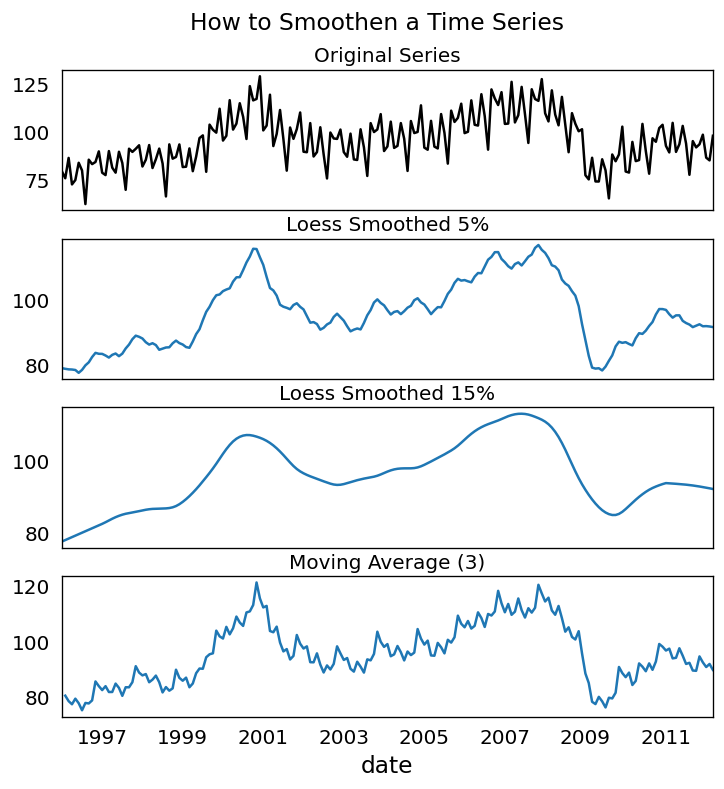

In [41]:
# LOWESS (Locally Weighted Scatterplot Smoothing) metodunu idxal edir
from statsmodels.nonparametric.smoothers_lowess import lowess  
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})  # Qrafik parametrlərini yeniləyir

# CSV faylını yükləyir, 'date' sütununu tarixi formatda oxuyur və indeks edir
df_orig = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/elecequip.csv', 
                      parse_dates=['date'], index_col='date')  

# 1. Moving Average
df_ma = df_orig.value.rolling(3, center=True, closed='both').mean() # 3 dövr üçün hərəkətli ortalamayı hesablayır

# 2. Loess Smoothing (5% and 15%)
# 5% LOWESS düzləşdirməsini hesablayır
df_loess_5 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.05)[:, 1], 
                                                  index=df_orig.index, columns=['value'])
# 15% LOWESS düzləşdirməsini hesablayır
df_loess_15 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.15)[:, 1], 
                                                  index=df_orig.index, columns=['value'])  

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)  # 4 qrafik üçün alt pəncərə yaradır
df_orig['value'].plot(ax=axes[0], color='k', title='Original Series')  # Orijinal seriyanı qara rəngdə çəkir
df_loess_5['value'].plot(ax=axes[1], title='Loess Smoothed 5%')  # 5% LOWESS düzləşdirilmiş seriyanı çəkir
df_loess_15['value'].plot(ax=axes[2], title='Loess Smoothed 15%')  # 15% LOWESS düzləşdirilmiş seriyanı çəkir
df_ma.plot(ax=axes[3], title='Moving Average (3)')  # 3 dövr üçün hərəkətli ortalamayı çəkir
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)  # Başlıq əlavə edir
plt.show()  # Qrafikləri göstərir


# Introduction to ARIMA Models

So what exactly is an ARIMA model?

ARIMA, short for ‘Auto Regressive Integrated Moving Average’ is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values. Know more about parameters of ARIMA and its limitations, in this free video tutorial

Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models.
An ARIMA model is characterized by 3 terms: p, d, q

where,

- p is the order of the AR term

- q is the order of the MA term

- d is the number of differencing required to make the time series stationary

If a time series, has seasonal patterns, then you need to add seasonal terms and it becomes SARIMA, short for ‘Seasonal ARIMA’.

# What does the p, d and q in ARIMA model mean

term ‘Auto Regressive’ in ARIMA means it is a linear regression model that uses its own lags as predictors. Linear regression models, as you know, work best when the predictors are not correlated and are independent of each other.

So how to make a series stationary? The most common approach is to difference it. That is, subtract the previous value from the current value. Sometimes, depending on the complexity of the series, more than one differencing may be needed.

The value of d, therefore, is the minimum number of differencing needed to make the series stationary. And if the time series is already stationary, then d = 0.

‘p’ is the order of the ‘Auto Regressive’ (AR) term. It refers to the number of lags of Y to be used as predictors. And ‘q’ is the order of the ‘Moving Average’ (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

A pure Auto Regressive (AR only) model is one where Yt depends only on its own lags. That is, Yt is a function of the ‘lags of Yt’. Likewise a pure Moving Average (MA only) model is one where Yt depends only on the lagged forecast errors.

ARIMA model in words:

Predicted Yt = Constant + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)

The objective, therefore, is to identify the values of p, d and q

# How to find the order of differencing (d) in ARIMA model

The purpose of differencing it to make the time series stationary.

But you need to be careful to not over-difference the series. Because, an over differenced series may still be stationary, which in turn will affect the model parameters.

So how to determine the right order of differencing?

The right order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quick.

If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing. On the other hand, if the lag 1 autocorrelation itself is too negative, then the series is probably over-differenced.

In the event, you can’t really decide between two orders of differencing, then go with the order that gives the least standard deviation in the differenced series.

Let’s see how to do it with an example.

First, I am going to check if the series is stationary using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.

Why? Because, you need differencing only if the series is non-stationary. Else, no differencing is needed, that is, d=0.

The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary.

So, in our case, if P Value > 0.05 we go ahead with finding the order of differencing.

In [42]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

from statsmodels.tsa.stattools import adfuller  # Augmented Dickey-Fuller (ADF) testini idxal edir
from numpy import log  # Numpy kitabxanasından log funksiyasını idxal edir
result = adfuller(df.value.dropna())  # ADF testini 'value' sütunu üzrə boş dəyərləri çıxararaq tətbiq edir
print('ADF Statistic: %f' % result[0])  # ADF statistikasının nəticəsini çap edir
print('p-value: %f' % result[1])  # p-dəyərinin nəticəsini çap edir

ADF Statistic: 3.145186
p-value: 1.000000


Since P-value is greater than the significance level, let’s difference the series and see how the autocorrelation plot looks like.

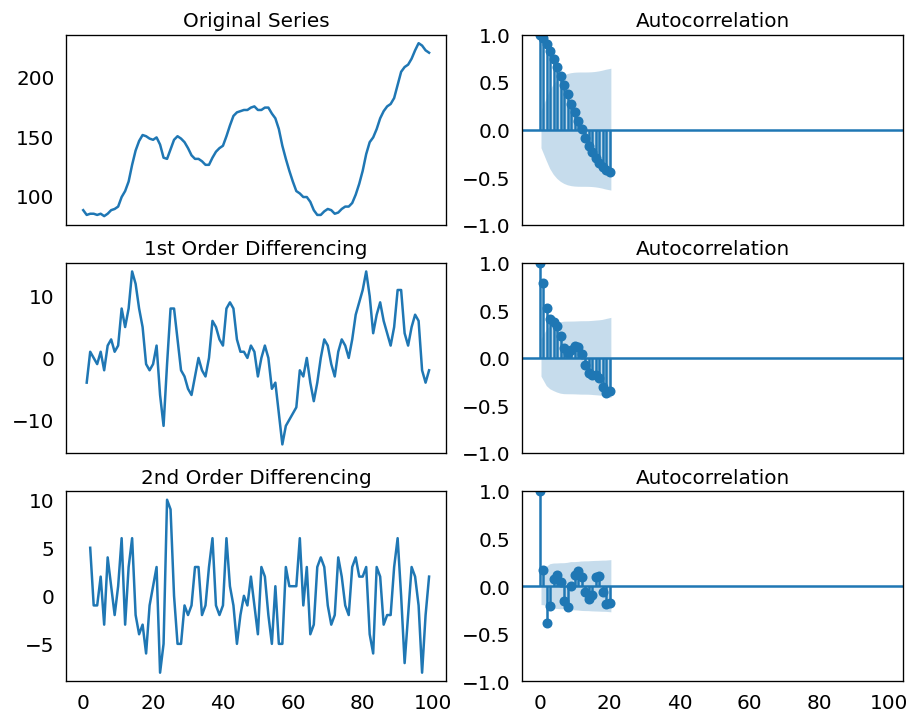

In [43]:
# Numpy və Pandas kitabxanalarını idxal edir
import numpy as np, pandas as pd  
# ACF və PACF qrafiklərini yaratmaq üçün kitabxanaları idxal edir
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  
# Qrafiklər çəkmək üçün Matplotlib kitabxanasını idxal edir
import matplotlib.pyplot as plt  
# Qrafiklərin ölçüsü və keyfiyyəti üçün parametrləri yeniləyir
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})  

# Verilənləri csv fayldan yükləyir
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)  


# Original Series
# 3x2 ölçülü qrafik sahəsi yaradır
fig, axes = plt.subplots(3, 2, sharex=True)  
# Orijinal məlumat sırasını çəkir
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')  
# Orijinal sıra üçün ACF qrafiki çəkir
plot_acf(df.value, ax=axes[0, 1])  

# 1st Differencing
# 1-ci dərəcəli fərqləndirmə tətbiq edir və qrafik çəkir
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')  
# 1-ci dərəcəli fərqləndirilmiş sıra üçün ACF qrafiki çəkir
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])  


# 2nd Differencing
# 2-ci dərəcəli fərqləndirmə tətbiq edir və qrafik çəkir
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')  
# 2-ci dərəcəli fərqləndirilmiş sıra üçün ACF qrafiki çəkir
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])  

# Bütün qrafikləri göstərir
plt.show()  


For the above series, the time series reaches stationarity with two orders of differencing. But on looking at the autocorrelation plot for the 2nd differencing the lag goes into the far negative zone fairly quick, which indicates, the series might have been over differenced.

So, I am going to tentatively fix the order of differencing as 1 even though the series is not perfectly stationary (weak stationarity).

# How to find the order of the AR term (p)?

The next step is to identify if the model needs any AR terms. You can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.

But what is PACF?

Partial autocorrelation can be imagined as the correlation between the series and its lag, after excluding the contributions from the intermediate lags. So, PACF sort of conveys the pure correlation between a lag and the series. That way, you will know if that lag is needed in the AR term or not.

Any autocorrelation in a stationarized series can be rectified by adding enough AR terms. So, we initially take the order of AR term to be equal to as many lags that crosses the significance limit in the PACF plot.

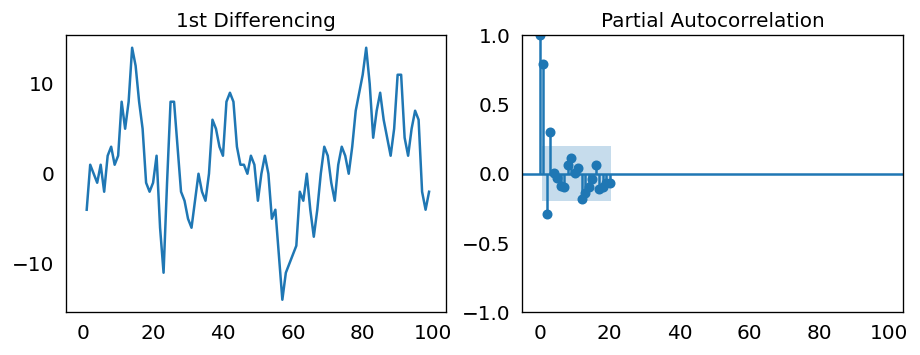

In [44]:
# PACF plot of 1st differenced series

# 1-ci dərəcəli fərqləndirilmiş seriyanın PACF qrafiki
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})  # Qrafik ölçüsü və keyfiyyəti yenilənir

# 1x2 ölçülü qrafik sahəsi yaradır
fig, axes = plt.subplots(1, 2, sharex=True)  
# 1-ci dərəcəli fərqləndirilmiş seriyanı çəkir
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')  
# PACF qrafiki üçün limit təyin edir və qrafiki çəkir
axes[1].set(ylim=(0,1.1))  
plot_pacf(df.value.diff().dropna(), ax=axes[1])  

# Qrafikləri göstərir
plt.show()  

You can observe that the PACF lag 1 is quite significant since is well above the significance line. Lag 2 and 3 turns out to be significant as well, slightly managing to cross the significance limit (blue region). But I am going to be conservative and tentatively fix the p as 1

# How to find the order of the MA term (q)?

Just like how we looked at the PACF plot for the number of AR terms, you can look at the ACF plot for the number of MA terms. An MA term is technically, the error of the lagged forecast.

The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.

Let’s see the autocorrelation plot of the differenced series.

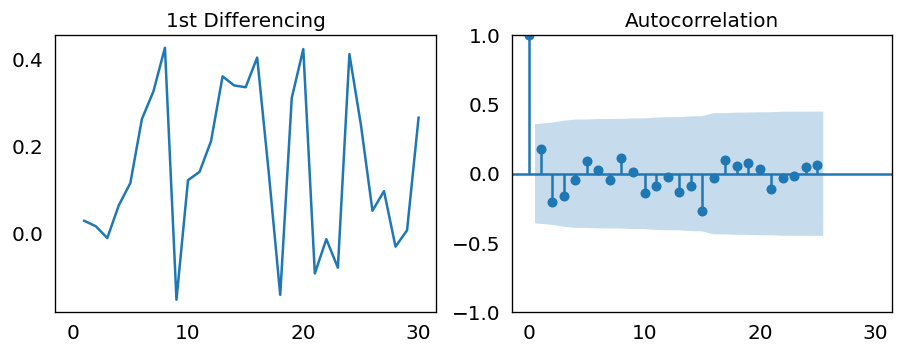

In [45]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})  # Qrafik ölçüsü və keyfiyyəti yenilənir

# Data import edilir
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/austa.csv')

# 1x2 ölçülü qrafik sahəsi yaradılır
fig, axes = plt.subplots(1, 2, sharex=True)  

# 1-ci dərəcəli fərqləndirilmiş seriya çəkilir
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')  
# ACF qrafiki üçün limit təyin edilir və qrafik çəkilir
axes[1].set(ylim=(0,1.2))  
plot_acf(df.value.diff().dropna(), ax=axes[1], lags=25)

# Qrafiklər göstərilir
plt.show()  

let’s tentatively fix q as 1.

# How to build the ARIMA Model

Now that you’ve determined the values of p, d and q, you have everything needed to fit the ARIMA model. Let’s use the ARIMA() implementation in statsmodels package.

In [46]:
df.head()

date     value
0  1980-01-01  0.829894
1  1981-01-01  0.859511
2  1982-01-01  0.876689
3  1983-01-01  0.866707
4  1984-01-01  0.932052

In [47]:
from statsmodels.tsa.arima_model import ARIMA

In [48]:
import statsmodels.api as sm  # Statsmodels kitabxanasından ARIMA modelini idxal edir

# ARIMA modelinin qurulması (p=1, d=1, q=1) parametrləri ilə
model = sm.tsa.arima.ARIMA(df.value, order=(1,1,1)) 

# Modelin uyğunlaşdırılması (fit metodu)
model_fit = model.fit() 

# Modelin xülasəsinin göstərilməsi (fit edilən modelin statistik nəticələri)
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   31
Model:                 ARIMA(1, 1, 1)   Log Likelihood                   7.329
Date:                Thu, 17 Oct 2024   AIC                             -8.658
Time:                        16:22:33   BIC                             -4.455
Sample:                             0   HQIC                            -7.313
                                 - 31                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.017     57.351      0.000       0.966       1.034
ma.L1         -0.9866      0.873     -1.130      0.259      -2.698       0.725
sigma2         0.0328      0.034      0.973      0.330      -0.033       0.099
===================================================================================
Ljung-Box (L1) (Q):                   1.16   Jarque-Bera (JB):                 1.80
Prob(Q):                              0.28   Prob(JB):                         0.41
Heteroskedasticity (H):               1.06   Skew:                            -0.33
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The model summary reveals a lot of information. The table in the middle is the coefficients table where the values under ‘coef’ are the weights of the respective terms.

P-Value in ‘P>|z|’ column is highly insignificant. It should ideally be less than 0.05 for the respective X to be significant.

So, let’s rebuild the model without the MA2 term.

In [49]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(df.value, order=(1,1,2))
model_fit = model.fit()
model_fit.summary()

C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   31
Model:                 ARIMA(1, 1, 2)   Log Likelihood                   8.314
Date:                Thu, 17 Oct 2024   AIC                             -8.627
Time:                        16:22:34   BIC                             -3.022
Sample:                             0   HQIC                            -6.834
                                 - 31                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.038     26.369      0.000       0.926       1.074
ma.L1         -0.6885      1.449     -0.475      0.635      -3.529       2.152
ma.L2         -0.2981      0.541     -0.551      0.582      -1.359       0.762
sigma2         0.0310      0.049      0.635      0.526      -0.065       0.127
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 1.52
Prob(Q):                              0.78   Prob(JB):                         0.47
Heteroskedasticity (H):               1.09   Skew:                            -0.47
Prob(H) (two-sided):                  0.89   Kurtosis:                         2.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The residual errors seem fine with near zero mean and uniform variance. Let’s plot the actuals against the fitted values using plot_predict()

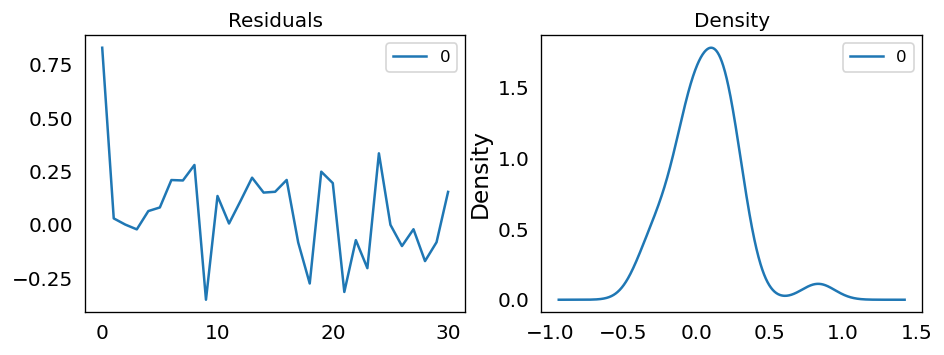

In [50]:
# Modelin qalıqlarını (residuals) DataFrame-ə çevir
# Bu addımda, modelin qalıq dəyərləri alınır və Pandas DataFrame formatına çevrilir.
residuals = pd.DataFrame(model_fit.resid)

# 1x2 ölçülü subplot yaratmaq üçün bir qrafik şablonu (figure) yaradılır.
# fig, ax = plt.subplots(1,2) funksiyası 1 sıra və 2 sütunlu subplotlar yaradır. 
# Nəticədə 'fig' obyektində qrafiklər olur, 'ax' isə subplotlar üçün oxları idarə edir.
fig, ax = plt.subplots(1, 2)

# Sol tərəfdəki subplotda qalıqların vaxt seriyasına görə qrafikini çəkir.
# residuals.plot() metodundan istifadə edərək qalıq dəyərlərin dəyişimini göstərən xətt qrafiki çəkilir.
residuals.plot(title="Residuals", ax=ax[0])

# Sağ tərəfdəki subplotda qalıqların sıxlıq qrafikini çəkir.
# kind='kde' - bu 'kernel density estimate' (KDE) sıxlıq qrafikini göstərmək üçün istifadə edilir.
# baxilir ki normal paylanib ya yox?
residuals.plot(kind='kde', title='Density', ax=ax[1])

# Qrafikləri göstərir.
# plt.show() funksiyası qrafikləri çıxışda göstərir.
plt.show()


When you set dynamic=False the in-sample lagged values are used for prediction.

That is, the model gets trained up until the previous value to make the next prediction. This can make the fitted forecast and actuals look artificially good.

So, we seem to have a decent ARIMA model. But is that the best?

Can’t say that at this point because we haven’t actually forecasted into the future and compared the forecast with the actual performance.

So, the real validation you need now is the Out-of-Time cross-validation.

## ARIMA

In [51]:
# statsmodels kitabxanasından acf (autocorrelation function) funksiyasını import edir.
# Bu funksiya zaman serisinin müxtəlif lag-lar (geriləmələr) üçün avtoreqressiv korrelyasiyasını hesablamaq 
#                                                                                             üçün istifadə edilir.
from statsmodels.tsa.stattools import acf

# Təlim və test dəstləri yaratmaq üçün zaman serisini iki yerə ayırır.
# 'train' dəyişəni df DataFrame-dəki 'value' sütununun ilk 24 dəyərini (təlim dəsti) alır.
train = df.value[:24]

# 'test' dəyişəni df DataFrame-dəki 'value' sütununun 24-cü indeksdən sonrakı dəyərlərini (test dəsti) alır.
test = df.value[24:]

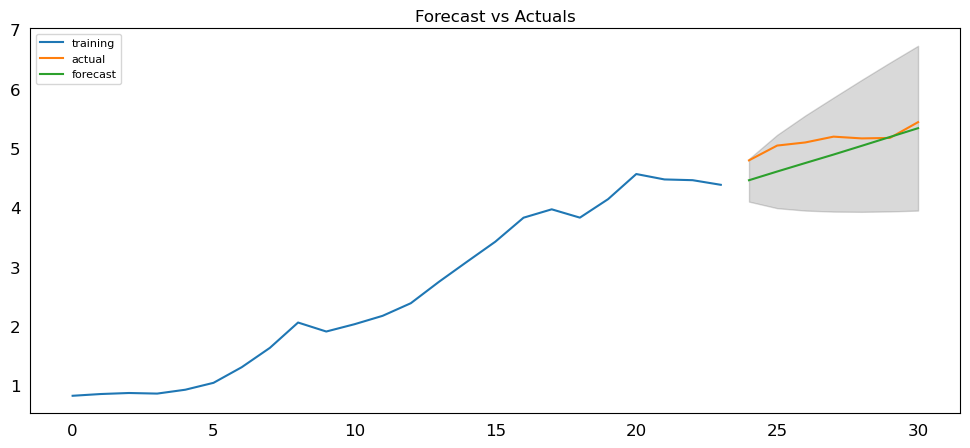

In [52]:
# Model qurulur
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train, order=(3, 2, 1))  # ARIMA modelini fərqli parametrlərlə yenidən quraşdırma (AR=1, I=1, MA=1)
fitted = model.fit()  # Modeli uyğunlaşdırır (train datası ilə məşq etdirir)

# Proqnoz hesablanır
forecast_result = fitted.get_forecast(steps=7)  # 7 addım irəli proqnozlaşdırma
fc = forecast_result.predicted_mean  # Proqnozlaşdırılan dəyərlər
conf = forecast_result.conf_int(alpha=0.05)  # 95% etibar intervalı

# Pandas Series olaraq nəticələri hazırlayır
fc_series = pd.Series(fc, index=test.index)  # Proqnoz dəyərlərini Pandas Series formatına çevirir (test indexi ilə)
lower_series = pd.Series(conf.iloc[:, 0], index=test.index)  # Aşağı etibar intervalı
upper_series = pd.Series(conf.iloc[:, 1], index=test.index)  # Yuxarı etibar intervalı

# Qrafik çəkir
plt.figure(figsize=(12,5), dpi=100)  # Şəkilin ölçüsünü və keyfiyyətini təyin edir
plt.plot(train, label='training')  # Train datasını qrafikdə çəkir
plt.plot(test, label='actual')  # Real test dəyərlərini qrafikdə göstərir
plt.plot(fc_series, label='forecast')  # Proqnoz edilmiş dəyərləri qrafikdə göstərir
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)  # Etibar intervalını qrafikdə kölgə ilə göstərir
plt.title('Forecast vs Actuals')  # Qrafikin başlığını təyin edir
plt.legend(loc='upper left', fontsize=8)  # Əfsanəni yuxarı sol küncdə göstərir
plt.show()  # Qrafiki göstərir

In [53]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, test.values)

{'mape': 0.046927533810394544,
 'me': -0.23311211797625223,
 'mae': 0.2376066992614762,
 'mpe': -0.04605897272114569,
 'rmse': 0.27795001118343704}

In [54]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error,\
                                                                                        root_mean_squared_error
print('MAE', mean_absolute_error(test, fc_series))
print('MAPE', mean_absolute_percentage_error(test, fc_series))
print('MSE', mean_squared_error(test, fc_series))
print('RMSE', root_mean_squared_error(test, fc_series))

MAE 0.2376066992614762
MAPE 0.046927533810394544
MSE 0.07725620871687278
RMSE 0.27795001118343704


### pmdarima package provides auto_arima() with similar functionality.

auto_arima() uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC.

In [55]:
# !pip install pmdarima

In [56]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [57]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

In [58]:
df

value
0      88
1      84
2      85
3      85
4      84
..    ...
95    222
96    228
97    226
98    222
99    220

[100 rows x 1 columns]

## PMDARIMA

In [59]:
import pmdarima as pm
model = pm.auto_arima(df.value, 
                      start_p=1, # AR (AutoRegressive) komponenti üçün başlanğıc p dəyəri (başlanğıc gecikmə dərəcəsi)
                      start_q=1, # MA (Moving Average) komponenti üçün başlanğıc q dəyəri (başlanğıc gecikmə dərəcəsi)
                      test='adf', # d dəyərini təyin etmək üçün ADF (Augmented Dickey-Fuller) testindən istifadə edir
                      max_p=3,       # p üçün maksimum dəyər (AutoRegressive komponentin maksimum gecikmə dərəcəsi)
                      max_q=3,       # q üçün maksimum dəyər (Moving Average komponentin maksimum gecikmə dərəcəsi)
               m=1,# Seriyanın tezliyi (1: hər müşahidə bir addım intervalında, mövsümsüz seriya üçün istifadə olunur)
                      d=None,        # d dəyəri (inteqrasiya dərəcəsi) avtomatik təyin olunur
                      seasonal=False,# Mövsümi komponentin nəzərə alınmaması üçün (mövsümsüz model)
                      start_P=0,     # Mövsümi AutoRegressive komponenti (SAR) üçün başlanğıc P dəyəri (sezon p)
                      D=0,           # Mövsümi inteqrasiya komponenti (mövsümi dərəcə) üçün D dəyəri (sezon d)
                      trace=True,    # Modelin təlim prosesi zamanı addımları izlə (parametrləri göstər)
                      error_action='ignore', # Xəta baş verərsə, onu gözardı et (modelin durmaması üçün)
                      suppress_warnings=True, # Xəbərdarlıqları göstərməmək üçün
                      stepwise=True # Addım-addım axtarış alqoritmindən istifadə et, modeli daha sürətli öyrənmək üçün
                     )


Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=525.587, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=533.474, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=532.437, Time=0.12 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=525.893, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=531.477, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=515.248, Time=0.25 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=513.459, Time=0.16 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=515.284, Time=0.20 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.08 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=511.465, Time=0.08 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=530.444, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=513.291, Time=0.10 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=513.256, Time=0.12 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=523.592, Time=0.10 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time

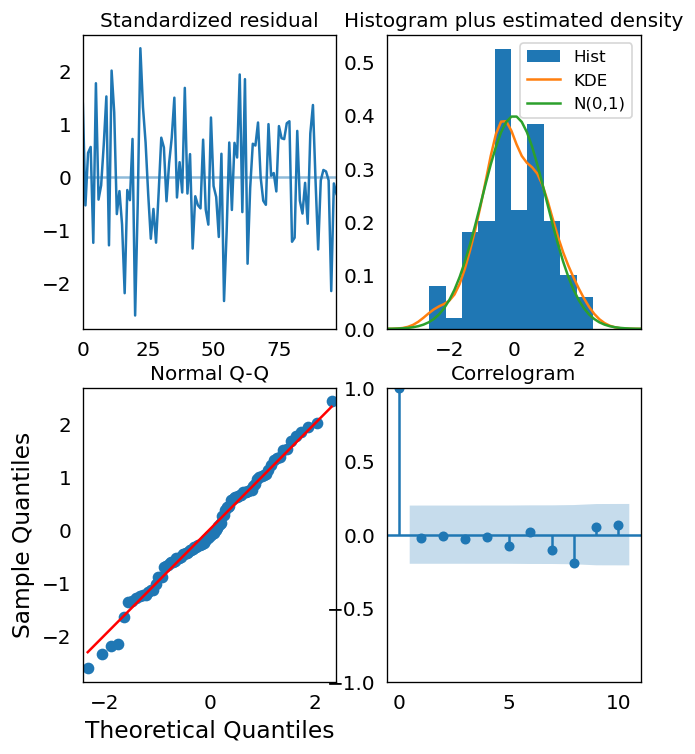

In [60]:
# Modelin diagnostik qrafikləri çıxarılır
model.plot_diagnostics(figsize=(6,7))  

# Qrafikləri ekranda göstərir
plt.show()  

`model.plot_diagnostics(figsize=(6,7))` kodu ARIMA modelinin diagnostikalarını göstərmək üçün istifadə olunur. Bu funksiya modelin uyğunluğunu və residuallarının (qalıqlarının) xüsusiyyətlərini qiymətləndirməyə kömək edən müxtəlif qrafiklər çıxarır.

### Bu funksiya hansı qrafikləri çıxarır və nə iş görür:
1. **Standartlaşdırılmış qalıqlar (Standardized residuals):**
   - Y eksenində qalıqlar, X eksenində zaman verilir. Bu qrafik qalıqların zamanla təsadüfi və stasionar olub-olmadığını yoxlamağa kömək edir. Qalıqlar təsadüfi yayılmalıdır.

2. **Histogram və kernel sıxlığı (Histogram plus KDE):**
   - Bu qrafik qalıqların normallığını göstərir. Qalıqların normal paylanması modelin yaxşı olduğunu göstərir. Qrafikdə qalıqların sıxlığı ilə normal paylama əyrisi müqayisə edilir.

3. **QQ plot (Quantile-Quantile plot):**
   - Bu qrafik qalıqların nəzəri olaraq normal paylanmaya nə qədər uyğun olduğunu qiymətləndirir. Qalıqlar düz bir xətt üzərindədirsə, normal paylanma ehtimalı yüksəkdir.

4. **Q-qrafik (Correlogram of residuals or ACF plot):**
   - Bu qrafik qalıqların avtoreqressiv təsirlərini yoxlayır. Burada qalıqların avtoreqressiv komponentlərində müəyyən bir naxış varsa, bu modeldə problem ola bilər.

### `figsize=(6,7)` nə iş görür?
- `figsize` qrafiklərin ölçüsünü təyin edir. Bu, qrafiklərin eni və hündürlüyünü (6 vahid genişlik, 7 vahid hündürlük) təyin edir. Bu parametr qrafiklərin daha oxunaqlı və aydın görünməsinə kömək edir, xüsusən də fərqli ölçülü ekranlarda.

Yəni, bu qrafiklər ARIMA modelinin uyğunsuzluqlarını, qalıqların davranışlarını və modelin keyfiyyətini qiymətləndirmək üçün istifadə olunur. Əgər qalıqlar normala yaxındırsa və ACF (avtokorrelyasiya funksiyası) qrafikində ciddi avtoreqressiya təsiri yoxdursa, bu modelin yaxşı uyğun olduğunu göstərir.

---
Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

Top Right: The density plot suggest normal distribution with mean zero.

Bottom left: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

Overall, it seems to be a good fit. Let’s forecast.

---
Yuxarı solda: Qalıq xətalar sıfır ortalaması ətrafında dəyişir və bərabər dəyişkənliyə sahibdir.

Yuxarı sağda: Sıxlıq qrafiki normal paylanmanı, ortalaması sıfır ilə göstərir.

Aşağı solda: Bütün nöqtələr qırmızı xətt üzərində mükəmməl bir şəkildə düzülməlidir. Hər hansı əhəmiyyətli sapmalar, paylanmanın asimmetrik olduğunu göstərəcək.

Aşağı sağda: Korrelogram, yəni ACF qrafiki qalıq xətaların avtoreqressiv olmadığını göstərir. Hər hansı avtoreqressiya, qalıq xətalarda modeldə izah edilməyən bir naxış olduğunu bildirir. Bu səbəbdən, modelə daha çox X (proqnozlaşdırıcı) əlavə etməlisiniz.

Ümumilikdə, bu modelin yaxşı uyğunlaşdığını göstərir. İndi proqnoz verək.

### Forecast

In [61]:
model.params

<bound method ARIMA.params of ARIMA(order=(2, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)>

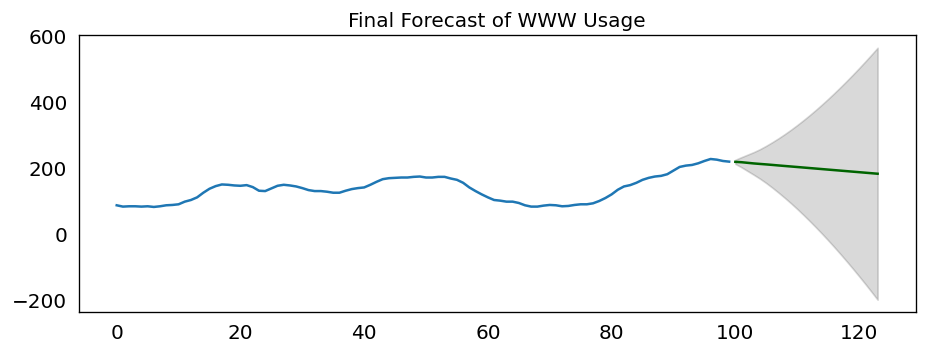

In [62]:
# Proqnozlaşdırılacaq dövrlərin sayını təyin edir, burada 24 dövr (məsələn, ay, gün) proqnozlaşdırılır.
n_periods = 24  

# Modeldən proqnozlaşdırılan dəyərləri və etimad intervallarını alır.
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)  

# Proqnozlaşdırılan dəyərlər üçün indeksləri təyin edir.
index_of_fc = np.arange(len(df.value), len(df.value) + n_periods)  

# Proqnozlaşdırılan dəyərləri pandas Series obyektinə çevirir.
fc_series = pd.Series(fc, index=index_of_fc)  

# Etimad intervallarının aşağı sərhədini pandas Series obyektinə çevirir.
lower_series = pd.Series(confint[:, 0], index=index_of_fc)  

# Etimad intervallarının yuxarı sərhədini pandas Series obyektinə çevirir.
upper_series = pd.Series(confint[:, 1], index=index_of_fc)  

# Orijinal məlumatları (df.value) plota gətirir.
plt.plot(df.value)  

# Proqnozlaşdırılan dəyərləri (fc_series) qara-yaşıl rəngdə plota gətirir.
plt.plot(fc_series, color='darkgreen')  

# Etimad intervalının aşağı və yuxarı sərhədini doldurur.
plt.fill_between(lower_series.index,  
                 lower_series,
                 upper_series,
                 color='k', alpha=.15)  # Doldurulan bölgənin rəngini qara edir, şəffaflığı isə 0.15 təyin edir.

# Plota başlıq əlavə edir.
plt.title("Final Forecast of WWW Usage")  

# Plotu göstərir.
plt.show()  


## Time Series Modeling with Prophet

In [63]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [64]:
# !pip install xlrd

In [65]:
#reading file
import pandas as pd
df = pd.read_excel(r"C:\Users\dell\Desktop\Python\week10\superstore.xls")
df

Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
1          2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
2          3  CA-2016-138688 2016-06-12 2016-06-16    Second Class   
3          4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
4          5  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9989    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
9990    9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9991    9992  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9992    9993  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9993    9994  CA-2017-119914 2017-05-04 2017-05-09    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United States        Henderson   
1       CG-12520       Claire Gute   Consumer  United States        Henderson   
2       DV-13045   Darrin Van Huff  Corporate  United States      Los Angeles   
3       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
4       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
...          ...               ...        ...            ...              ...   
9989    TB-21400  Tom Boeckenhauer   Consumer  United States            Miami   
9990    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
9991    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
9992    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
9993    CC-12220      Chris Cortes   Consumer  United States      Westminster   

      ... Postal Code  Region       Product ID         Category Sub-Category  \
0     ...       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1     ...       42420   South  FUR-CH-10000454        Furniture       Chairs   
2     ...       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3     ...       33311   South  FUR-TA-10000577        Furniture       Tables   
4     ...       33311   South  OFF-ST-10000760  Office Supplies      Storage   
...   ...         ...     ...              ...              ...          ...   
9989  ...       33180   South  FUR-FU-10001889        Furniture  Furnishings   
9990  ...       92627    West  FUR-FU-10000747        Furniture  Furnishings   
9991  ...       92627    West  TEC-PH-10003645       Technology       Phones   
9992  ...       92627    West  OFF-PA-10004041  Office Supplies        Paper   
9993  ...       92683    West  OFF-AP-10002684  Office Supplies   Appliances   

                                           Product Name     Sales  Quantity  \
0                     Bush Somerset Collection Bookcase  261.9600         2   
1     Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2     Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3         Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                        Eldon Fold 'N Roll Cart System   22.3680         2   
...                                                 ...       ...       ...   
9989                             Ultra Door Pull Handle   25.2480         3   
9990  Tenex B1-RE Series Chair Mats for Low Pile Car...   91.9600         2   
9991                              Aastra 57i VoIP phone  258.5760         2   
9992  It's Hot Message Books with Stickers, 2 3/4" x 5"   29.6000         4   
9993  Acco 7-Outlet Masterpiece Power Center, Wihtou...  243.1600         2   

      Discount    Profit  
0         0.00   41.9136  
1         0.00  219.5820  
2         0.00    6.8714  
3         0.45 -383.0310  
4         0.20    2.5164  
...        ...       ...  
9989      0.20    4.1028  
9990      0.00   15.6332  
9991      0.20   19.3932  
9992      0.

In [66]:
furniture = df.loc[df['Category'] == 'Furniture']

In [67]:
#minimum and maximum dates
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [68]:
#removing columns we don't need and check if there is any missing value
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
        'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 
                            'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [69]:
furniture

Order Date     Sales
7474 2014-01-06  2573.820
7660 2014-01-07    76.728
866  2014-01-10    51.940
716  2014-01-11     9.940
2978 2014-01-13   545.940
...         ...       ...
7636 2017-12-29   258.750
7632 2017-12-29  1207.840
5131 2017-12-29   101.120
7635 2017-12-29   300.980
906  2017-12-30   323.136

[2121 rows x 2 columns]

In [70]:
#groupby index date
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [71]:
furniture

Order Date      Sales
0   2014-01-06  2573.8200
1   2014-01-07    76.7280
2   2014-01-10    51.9400
3   2014-01-11     9.9400
4   2014-01-13   879.9390
..         ...        ...
884 2017-12-24  1393.4940
885 2017-12-25   832.4540
886 2017-12-28   551.2568
887 2017-12-29  2330.7180
888 2017-12-30   323.1360

[889 rows x 2 columns]

In [72]:
#Indexing with Time Series Data
furniture = furniture.set_index('Order Date')
furniture

Sales
Order Date           
2014-01-06  2573.8200
2014-01-07    76.7280
2014-01-10    51.9400
2014-01-11     9.9400
2014-01-13   879.9390
...               ...
2017-12-24  1393.4940
2017-12-25   832.4540
2017-12-28   551.2568
2017-12-29  2330.7180
2017-12-30   323.1360

[889 rows x 1 columns]

In [73]:
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [74]:
#we will use the averages daily sales value for that month instead, and we are using the start of each month 
#                                                                                                 as the timestamp.
y = furniture['Sales'].resample('MS').mean()

In [75]:
type(y)

pandas.core.series.Series

In [76]:
y.head(8)

Order Date
2014-01-01    480.194231
2014-02-01    367.931600
2014-03-01    857.291529
2014-04-01    567.488357
2014-05-01    432.049188
2014-06-01    695.059242
2014-07-01    601.169500
2014-08-01    457.521656
Freq: MS, Name: Sales, dtype: float64

In [77]:
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

In [78]:
furniture['2017':].reset_index().sort_values('Order Date',ascending=True)

Order Date      Sales
0   2017-01-01   975.4900
1   2017-01-02   913.4300
2   2017-01-08   892.9800
3   2017-01-12    37.6800
4   2017-01-13   212.9400
..         ...        ...
253 2017-12-24  1393.4940
254 2017-12-25   832.4540
255 2017-12-28   551.2568
256 2017-12-29  2330.7180
257 2017-12-30   323.1360

[258 rows x 2 columns]

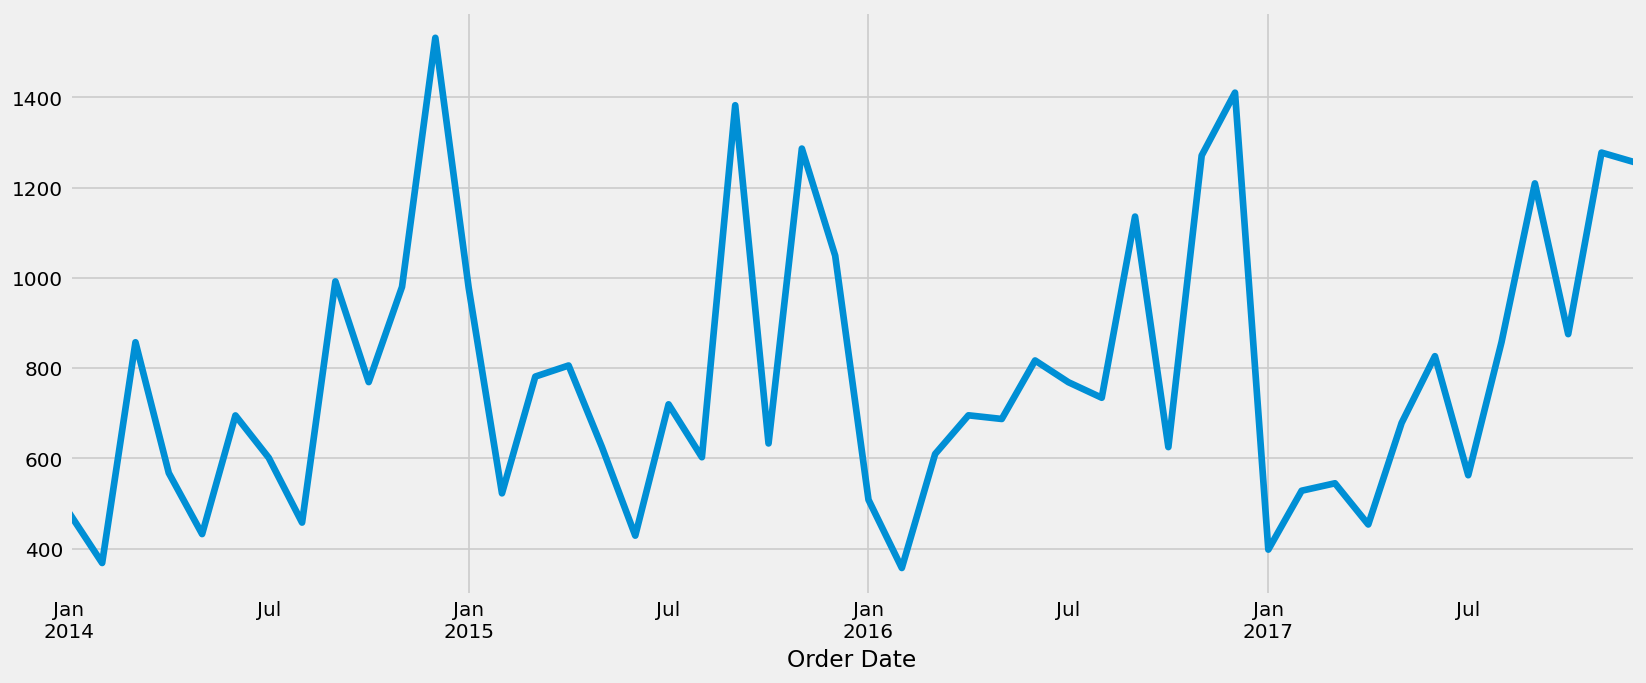

In [79]:
#visualizing time-series data
import matplotlib.pyplot as plt
import seaborn as sns

y.plot(figsize=(15, 6))
plt.show()

### Alternativ variant aylar uzre ortalama satis

<Axes: xlabel='Order Date'>

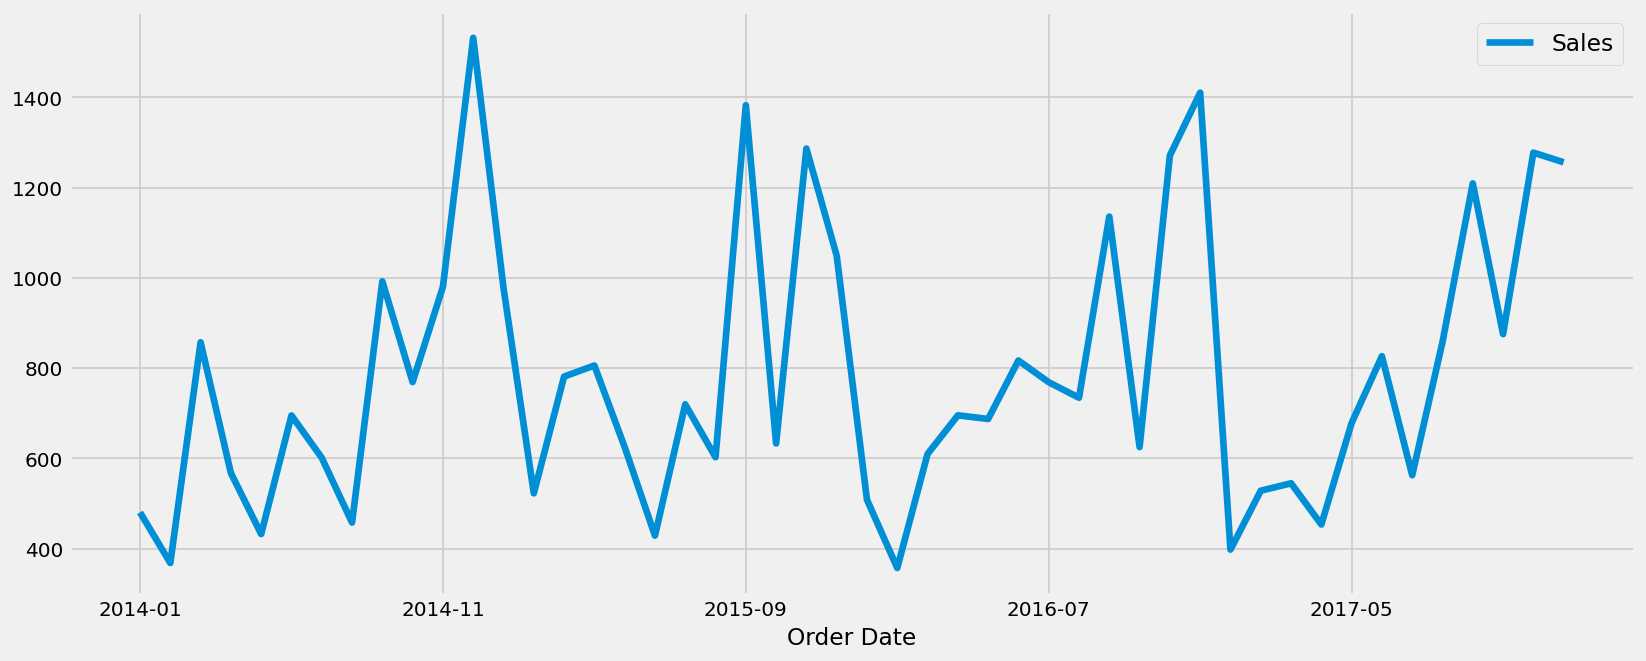

In [80]:
import copy 
furniture_test = copy.deepcopy(furniture)
furniture_test.reset_index(inplace=True)
furniture_test['Order Date']=furniture_test['Order Date'].dt.strftime('%Y-%m')
furniture_test.groupby('Order Date').mean().plot(figsize=(15, 6))

### Selecting Furniture

In [81]:
#selecting furniture and office supplies
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
furniture.shape, office.shape

((2121, 21), (6026, 21))

### Data Preparation

In [82]:
#data preparation
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 
        'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 
        'Discount', 'Profit']

furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)

furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')

furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()

furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')

y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()

furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})

store = furniture.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head()

Order Date  furniture_sales  office_sales
0 2014-01-01       480.194231    285.357647
1 2014-02-01       367.931600     63.042588
2 2014-03-01       857.291529    391.176318
3 2014-04-01       567.488357    464.794750
4 2014-05-01       432.049188    324.346545

### Plotting Time Series

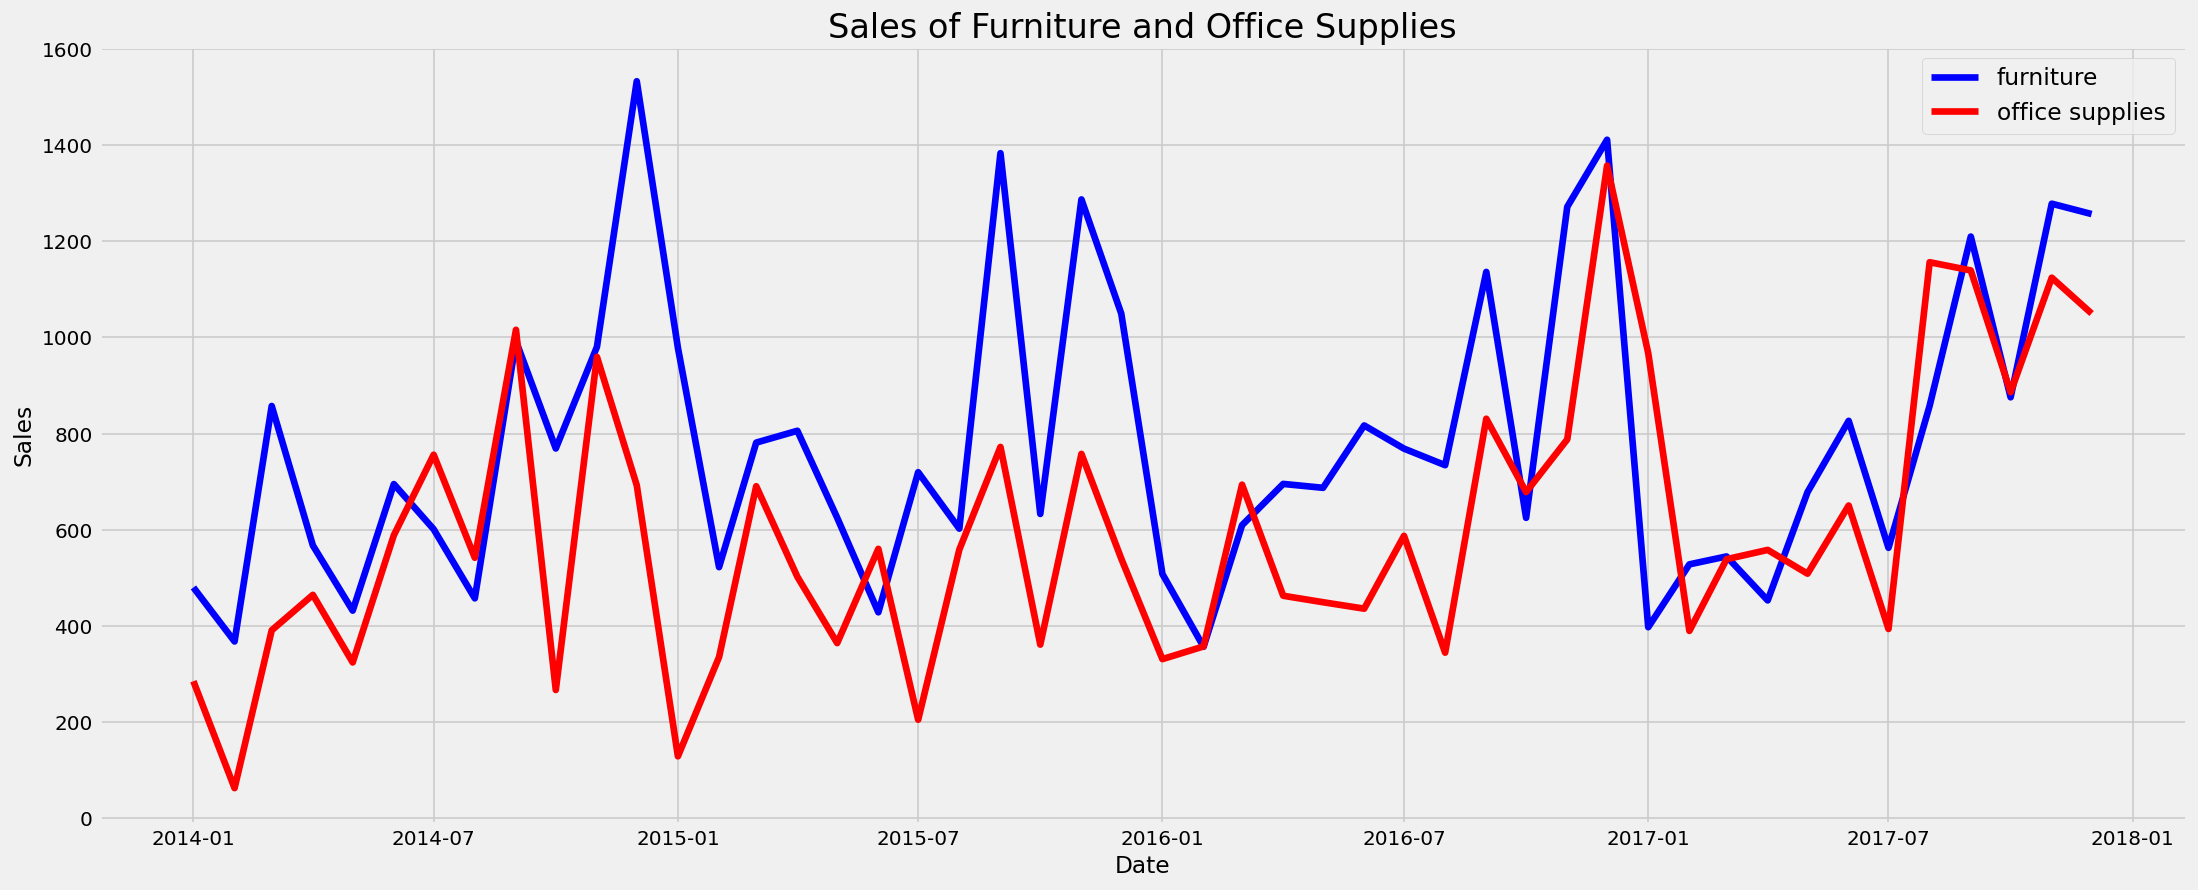

In [83]:
#plotting time series
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Furniture and Office Supplies')
plt.legend();

In [84]:
# !pip install prophet

### Craeating Prophet Model

In [85]:
# Prophet kitabxanasından Prophet modelini import edirik
from prophet import Prophet

# 'Order Date' sütununu 'ds' olaraq və 'Sales' sütununu 'y' olaraq dəyişdiririk
# Prophet modelində zaman seriyası analizində zaman sütunu 'ds', dəyər sütunu isə 'y' olmalıdır
furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
# Furniture (mebel) datası üçün Prophet modelini yaradırıq və etibarlılıq intervalı 95% olaraq təyin edirik
furniture_model = Prophet(interval_width=0.95)
# Furniture datası üçün Prophet modelini öyrədirik (train edirik)
furniture_model.fit(furniture)

# 'Order Date' və 'Sales' sütunlarını office datası üçün də 'ds' və 'y' olaraq dəyişdiririk
office = office.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
# Office datası üçün Prophet modelini yaradırıq və interval width 95% olaraq təyin edirik
office_model = Prophet(interval_width=0.95)
# Office datası üçün Prophet modelini öyrədirik
office_model.fit(office)

# Furniture üçün gələcəkdəki 36 ay ərzində (36 period, freq=‘MS’) təyin etmək üçün yeni zaman çərçivəsi yaradırıq
furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')
# Prophet modelindən istifadə edərək proqnozlaşdırılmış dəyərləri alırıq
furniture_forecast = furniture_model.predict(furniture_forecast)

# Office üçün gələcəkdəki 36 ay ərzində proqnozlaşdırmaq üçün yeni zaman çərçivəsi yaradırıq
office_forecast = office_model.make_future_dataframe(periods=36, freq='MS')
# Prophet modelindən istifadə edərək office datası üçün proqnozlaşdırılmış dəyərləri alırıq
office_forecast = office_model.predict(office_forecast)


16:23:09 - cmdstanpy - INFO - Chain [1] start processing
16:23:10 - cmdstanpy - INFO - Chain [1] done processing
16:23:11 - cmdstanpy - INFO - Chain [1] start processing
16:23:12 - cmdstanpy - INFO - Chain [1] done processing


In [86]:
# Prophet?

### Plotting Furniture Forecast

<Figure size 2160x720 with 0 Axes>

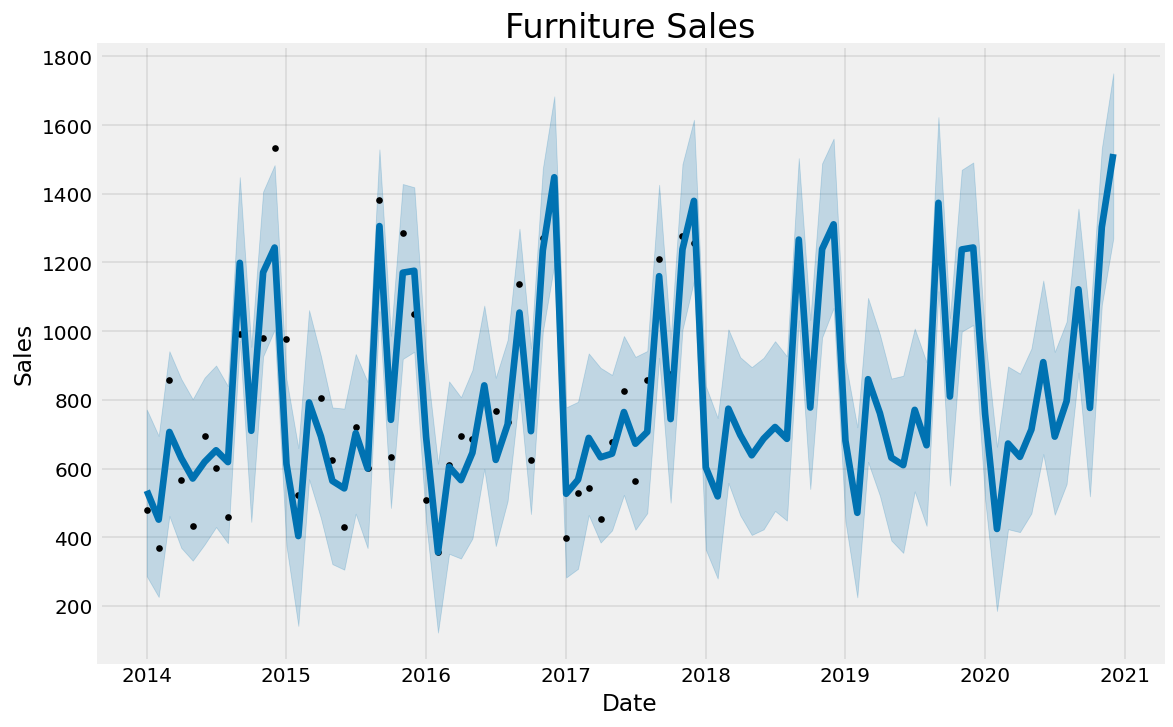

In [87]:
#plotting furniture forecast
plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales');

### Plotting Office Supplies Sales Forecast

<Figure size 2160x720 with 0 Axes>

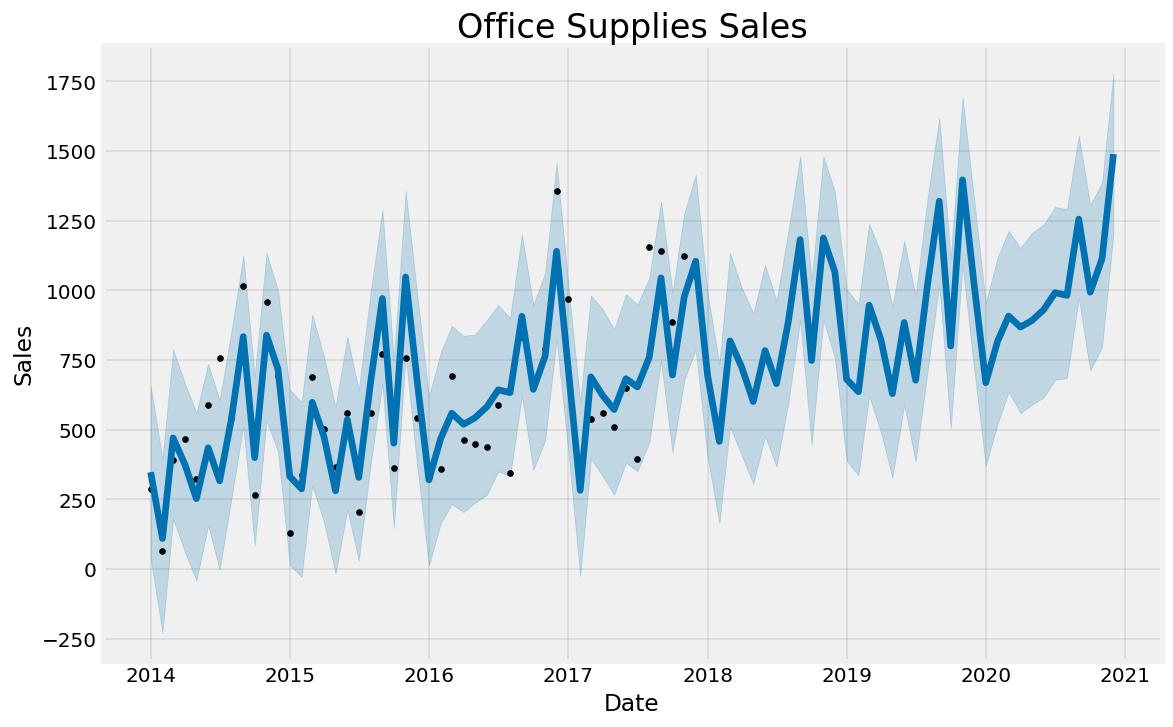

In [88]:
#plotting office supplies sales forecast
plt.figure(figsize=(18, 6))
office_model.plot(office_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Office Supplies Sales');

### Final Data Frame

In [89]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# 'furniture_forecast' dataframe-dəki sütun adlarına 'furniture_' prefiksi əlavə edir
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]

# 'office_forecast' dataframe-dəki sütun adlarına 'office_' prefiksi əlavə edir
office_names = ['office_%s' % column for column in office_forecast.columns]

# 'furniture_forecast' dataframe-nin bir nüsxəsini yaradır
merge_furniture_forecast = furniture_forecast.copy()

# 'office_forecast' dataframe-nin bir nüsxəsini yaradır
merge_office_forecast = office_forecast.copy()

# 'merge_furniture_forecast' dataframe-də sütun adlarını dəyişir
merge_furniture_forecast.columns = furniture_names

# 'merge_office_forecast' dataframe-də sütun adlarını dəyişir
merge_office_forecast.columns = office_names

# Mebel və ofis proqnozlarını tarix sütunları ilə birləşdirir
# 'furniture_ds' tarix sütunu 'office_ds' sütunu ilə uyğun gəlir
forecast = pd.merge(merge_furniture_forecast, merge_office_forecast, how='inner', left_on='furniture_ds', 
                                                                                    right_on='office_ds')

# 'furniture_ds' sütununu 'Date' olaraq yenidən adlandırır və 'office_ds' sütununu silir
forecast = forecast.rename(columns={'furniture_ds': 'Date'}).drop('office_ds', axis=1)

# İlk beş satırı göstərir
forecast.head()

Date  furniture_trend  furniture_yhat_lower  furniture_yhat_upper  \
0 2014-01-01       726.058109            285.942521            771.523588   
1 2014-02-01       727.494421            225.936054            694.751893   
2 2014-03-01       728.791734            461.748682            941.377752   
3 2014-04-01       730.228046            368.808663            860.582083   
4 2014-05-01       731.618025            331.660737            801.851070   

   furniture_trend_lower  furniture_trend_upper  furniture_additive_terms  \
0             726.058109             726.058109               -190.686099   
1             727.494421             727.494421               -276.379157   
2             728.791734             728.791734                -22.388253   
3             730.228046             730.228046               -100.140909   
4             731.618025             731.618025               -160.818882   

   furniture_additive_terms_lower  furniture_additive_terms_upper  \
0                     -190.686099                     -190.686099   
1                     -276.379157                     -276.379157   
2                      -22.388253                      -22.388253   
3                     -100.140909                     -100.140909   
4                     -160.818882                     -160.818882   

   furniture_yearly  furniture_yearly_lower  furniture_yearly_upper  \
0       -190.686099             -190.686099             -190.686099   
1       -276.379157             -276.379157             -276.379157   
2        -22.388253              -22.388253              -22.388253   
3       -100.140909             -100.140909             -100.140909   
4       -160.818882             -160.818882             -160.818882   

   furniture_multiplicative_terms  furniture_multiplicative_terms_lower  \
0                             0.0                                   0.0   
1                             0.0                                   0.0   
2                             0.0                                   0.0   
3                             0.0                                   0.0   
4                             0.0                                   0.0   

   furniture_multiplicative_terms_upper  furniture_yhat  office_trend  \
0                                   0.0      535.372010    487.530485   
1                                   0.0      451.115264    494.918166   
2                                   0.0      706.403481    501.590911   
3                                   0.0      630.087137    508.978592   
4                                   0.0      570.799142    516.127962   

   office_yhat_lower  office_yhat_upper  office_trend_lower  \
0          37.422212         655.535576          487.530485   
1        -227.904164         396.245477          494.918166   
2         180.030802         787.044097          501.590911   
3          61.548434         665.806750          508.978592   
4         -41.780205         560.849653          516.127962   

   office_trend_upper  office_additive_terms  office_additive_terms_lower  \
0          487.530485            -140.041115                  -140.041115   
1          494.918166            -385.677761                  -385.677761   
2          501.590911             -31.378526                   -31.378526   
3          508.978592            -134.290665                  -134.290665   
4          516.127962            -263.823552                  -263.823552   

   office_additive_terms_upper  office_yearly  office_yearly_lower  \
0                  -140.041115    -140.041115          -140.041115   
1                  -385.677761    -385.677761          -385.677761   
2                   -31.378526     -31.378526           -31.378526   
3                  -134.290665    -134.290665          -134.290665   
4                  -263.823552    -263.823552          -263.823552   

   office_yearly_upper  office_multiplicative_terms  \
0          -140.041115          

In [90]:
forecast.loc[forecast['Date']>='2018', ['Date', 'furniture_yhat', 'office_yhat']].head()

Date  furniture_yhat  office_yhat
48 2018-01-01      603.063969   695.899494
49 2018-02-01      518.807222   457.661231
50 2018-03-01      774.095439   818.642876
51 2018-04-01      697.779094   723.129120
52 2018-05-01      638.491100   600.755958

### Trend Visualisation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


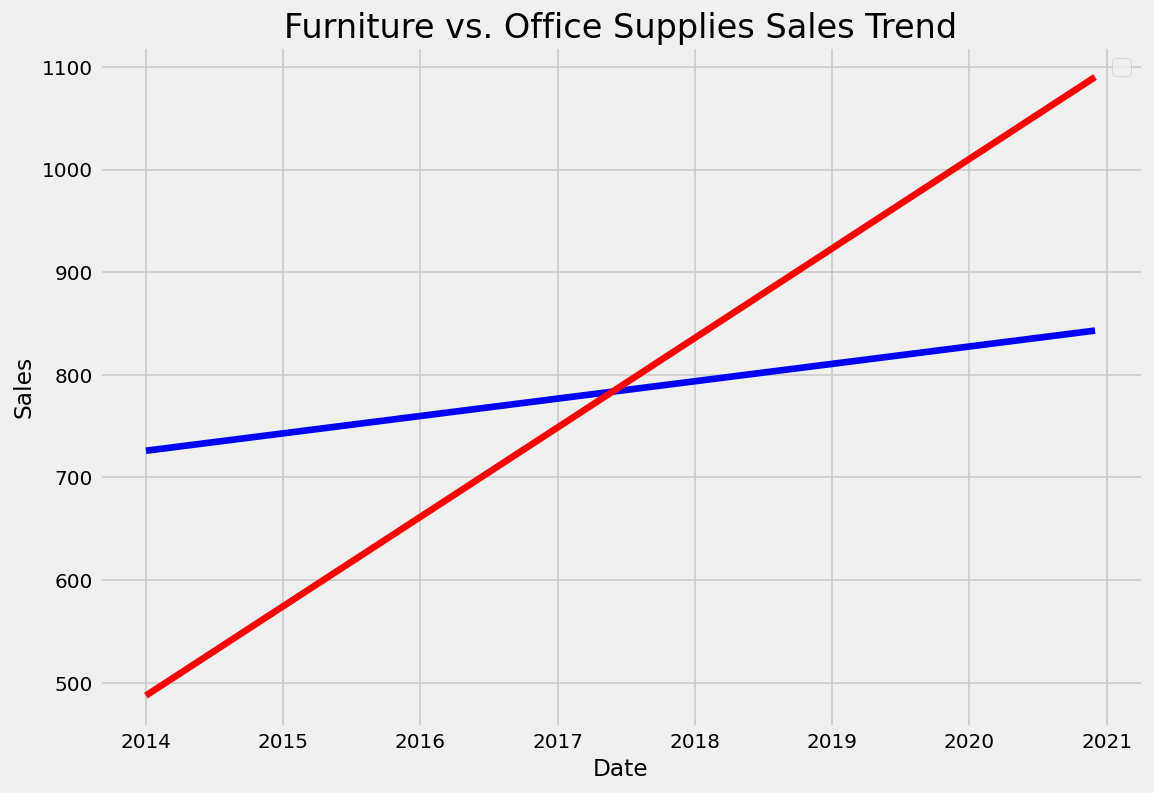

In [91]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_trend'], 'b-')
plt.plot(forecast['Date'], forecast['office_trend'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Sales Trend');

### Forecast Visualisation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


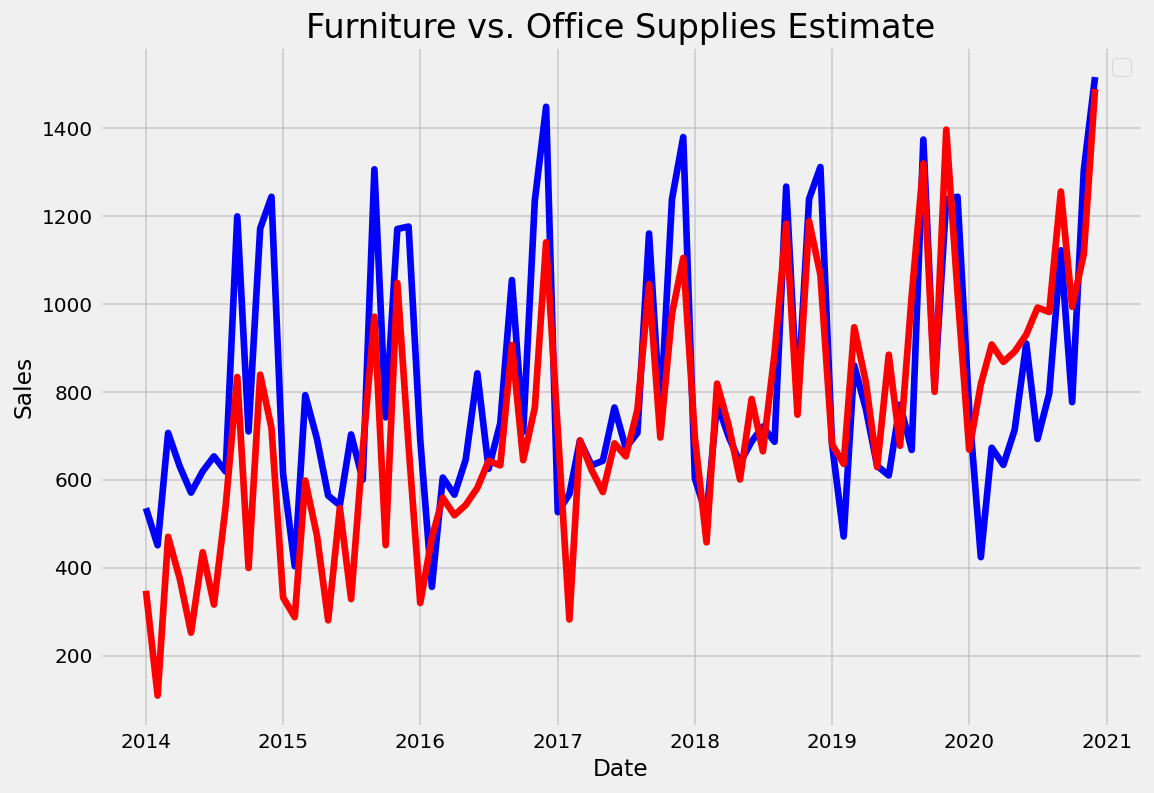

In [92]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['office_yhat'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Estimate');

### Plot Components of Time-series

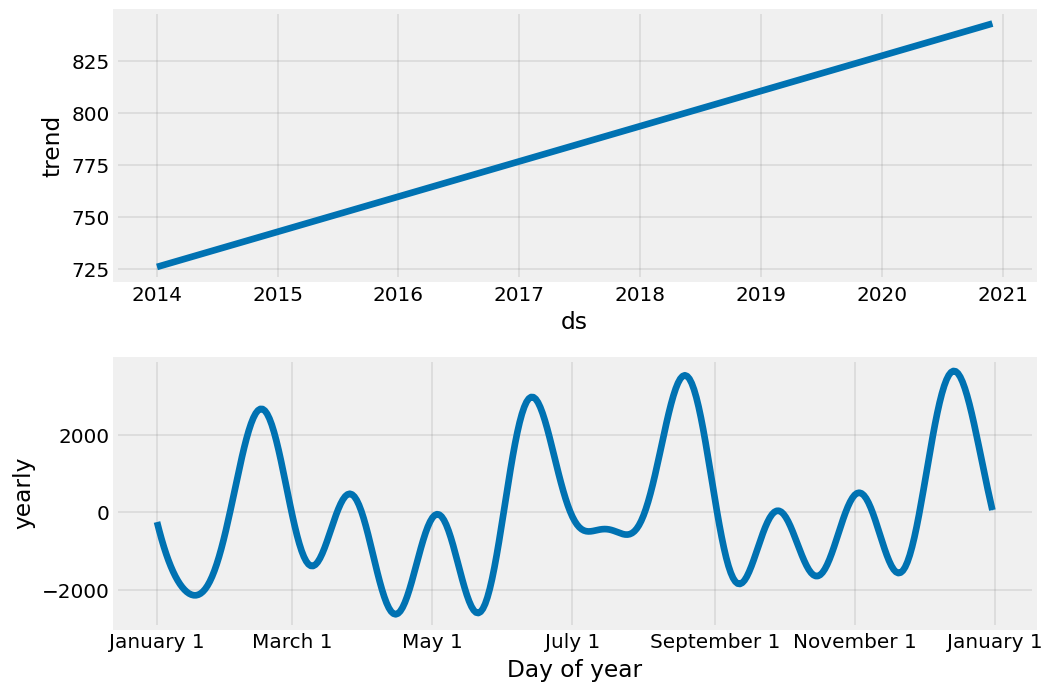

In [93]:
#plot components of time-series
furniture_model.plot_components(furniture_forecast);

### Modelin Diagnostik qrafikləri çıxarılır

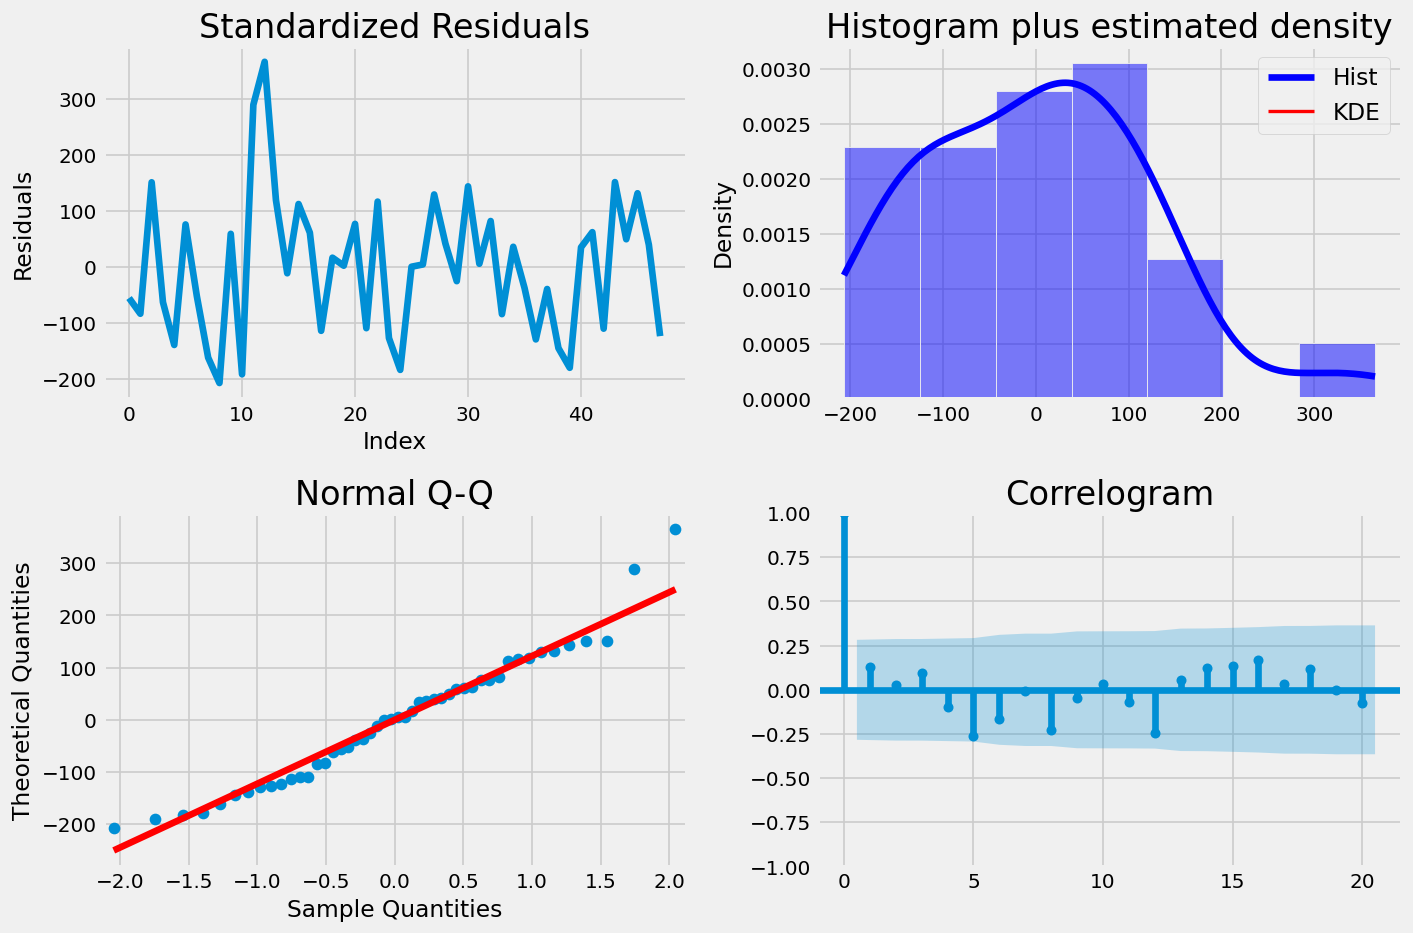

In [94]:
# Qalıqları hesablayın
residuals = furniture['y'] - forecast['furniture_yhat'][:len(furniture)]

# Vizualizasiya üçün tərtibat
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# 1. Standartlaşdırılmış qalıqlar
axs[0, 0].plot(residuals)
axs[0, 0].set_title('Standardized Residuals')
axs[0, 0].set_xlabel('Index')
axs[0, 0].set_ylabel('Residuals')

# 2. Histogram və KDE
sns.histplot(residuals, kde=True, ax=axs[0, 1], stat='density', color='blue')
axs[0, 1].set_title('Histogram plus estimated density')
axs[0, 1].axhline(0, color='red', lw=2)
axs[0, 1].legend(['Hist', 'KDE'])

# 3. Q-Q Plot
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(residuals, line='s', ax=axs[1, 0])  # line='s' xətdə qırmızı xətt çəkmək üçündür
axs[1, 0].set_title('Normal Q-Q')
axs[1, 0].set_xlabel('Sample Quantities')
axs[1, 0].set_ylabel('Theoretical Quantities')
plt.grid(True)


# 4. Korrelogram
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, ax=axs[1, 1], lags=20)
axs[1, 1].set_title('Correlogram')

plt.tight_layout()
plt.show()

## Time-series modeling with NeuralProphet

In [163]:
# !pip install neuralprophet

In [164]:
# !pip install plotly

In [165]:
from neuralprophet import NeuralProphet

import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [166]:
import pandas as pd
df = pd.read_excel(r"C:\Users\dell\Desktop\Python\week10\superstore.xls")
df

Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
1          2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
2          3  CA-2016-138688 2016-06-12 2016-06-16    Second Class   
3          4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
4          5  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9989    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
9990    9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9991    9992  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9992    9993  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9993    9994  CA-2017-119914 2017-05-04 2017-05-09    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United States        Henderson   
1       CG-12520       Claire Gute   Consumer  United States        Henderson   
2       DV-13045   Darrin Van Huff  Corporate  United States      Los Angeles   
3       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
4       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
...          ...               ...        ...            ...              ...   
9989    TB-21400  Tom Boeckenhauer   Consumer  United States            Miami   
9990    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
9991    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
9992    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
9993    CC-12220      Chris Cortes   Consumer  United States      Westminster   

           State  Postal Code Region       Product ID         Category  \
0       Kentucky        42420  South  FUR-BO-10001798        Furniture   
1       Kentucky        42420  South  FUR-CH-10000454        Furniture   
2     California        90036   West  OFF-LA-10000240  Office Supplies   
3        Florida        33311  South  FUR-TA-10000577        Furniture   
4        Florida        33311  South  OFF-ST-10000760  Office Supplies   
...          ...          ...    ...              ...              ...   
9989     Florida        33180  South  FUR-FU-10001889        Furniture   
9990  California        92627   West  FUR-FU-10000747        Furniture   
9991  California        92627   West  TEC-PH-10003645       Technology   
9992  California        92627   West  OFF-PA-10004041  Office Supplies   
9993  California        92683   West  OFF-AP-10002684  Office Supplies   

     Sub-Category                                       Product Name  \
0       Bookcases                  Bush Somerset Collection Bookcase   
1          Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...   
2          Labels  Self-Adhesive Address Labels for Typewriters b...   
3          Tables      Bretford CR4500 Series Slim Rectangular Table   
4         Storage                     Eldon Fold 'N Roll Cart System   
...           ...                                                ...   
9989  Furnishings                             Ultra Door Pull Handle   
9990  Furnishings  Tenex B1-RE Series Chair Mats for Low Pile Car...   
9991       Phones                              Aastra 57i VoIP phone   
9992        Paper  It's Hot Message Books with Stickers, 2 3/4" x 5"   
9993   Appliances  Acco 7-Outlet Masterpiece Power Center, Wihtou...   

         Sales  Quantity  Discount    Profit  
0     261.9600         2      0.00   41.9136  
1     731.9400         3      0.00  219.5820  
2      14.6200         2      0.00    6.8714  
3     957.5775         5      0.45 -383.0310  
4      22.3680         2      0.20    2.5164  
...        ...       ...       ...       ...  
9989   25.2480         3      0.20    4.1028  
9990   91.9600         2      0.00   15.6332  
9991  258.5760 

### Selecting Furniture

In [167]:
furniture = df.loc[df['Category'] == 'Furniture']

In [168]:
furniture.head(2)

Row ID        Order ID Order Date  Ship Date     Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11  Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11  Second Class    CG-12520   

  Customer Name   Segment        Country       City     State  Postal Code  \
0   Claire Gute  Consumer  United States  Henderson  Kentucky        42420   
1   Claire Gute  Consumer  United States  Henderson  Kentucky        42420   

  Region       Product ID   Category Sub-Category  \
0  South  FUR-BO-10001798  Furniture    Bookcases   
1  South  FUR-CH-10000454  Furniture       Chairs   

                                        Product Name   Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.96         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.94         3   

   Discount    Profit  
0       0.0   41.9136  
1       0.0  219.5820

### Data Preparation

In [169]:
#removing columns we don't need and check if there is any missing value
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 
        'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 
        'Quantity', 'Discount', 'Profit']

furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [170]:
#groupby index date
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

furniture = furniture.set_index('Order Date')

#we will use the averages daily sales value for that month instead, and we are using the start of each month 
#                                                                                                 as the timestamp.
y = furniture['Sales'].resample('MS').mean()

#rename column names as neural prophet expect time-series as ds and value to predict as y
y= y.reset_index()
y.rename(columns={"Order Date": "ds", "Sales": "y"}, inplace=True)

In [171]:
y.head()

ds           y
0 2014-01-01  480.194231
1 2014-02-01  367.931600
2 2014-03-01  857.291529
3 2014-04-01  567.488357
4 2014-05-01  432.049188

### Plotting Time Series

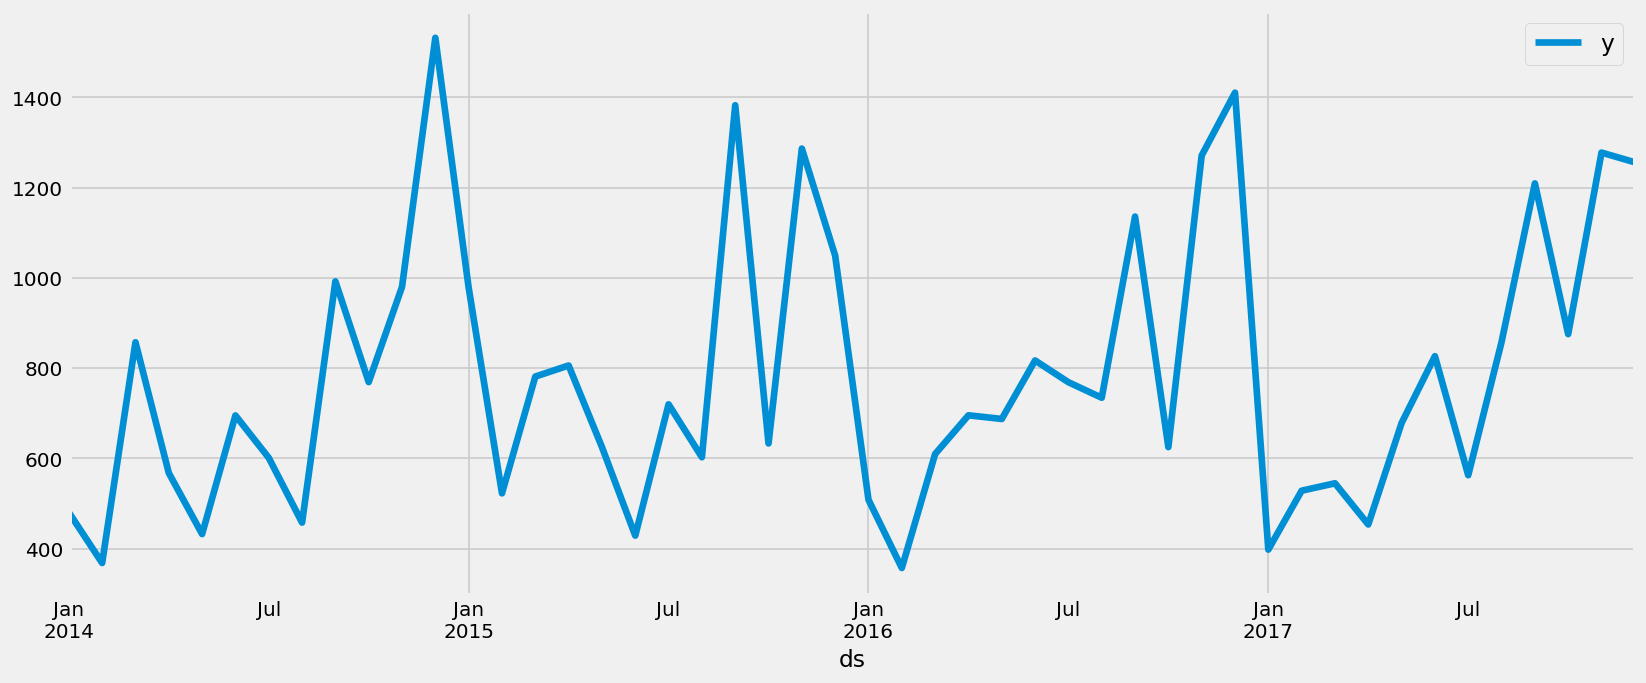

In [172]:
y.plot(x='ds',y='y',figsize=(15, 6))
plt.show()

### Find Best Learning Rate

In [237]:
# !pip install optuna

In [281]:
import optuna

def objective(trial):
    model = NeuralProphet(
    # Model trend növünü təyin edir: 'linear' - xətti trend, 'discontinuous' - kəsilən trend, 'off' - trend olmadan.
    growth="linear",
    # Dəyişiklik nöqtələrinin tarixlərinin siyahısı (None -> avtomatik tapılacaq).
    changepoints=None,
    # Modeldə istifadə olunacaq maksimum dəyişiklik nöqtələrinin sayı.
    n_changepoints=5,
    # Dəyişiklik nöqtələrinin yerləşdirildiyi vaxt intervalı (tarixlərin 80%-lik hissəsi daxilində).
    changepoints_range=0.8,
    # Trendə cərimə (regulyarizasiya) tətbiq etmək üçün parametr (0 - regulyarizasiya yoxdur).
    trend_reg=0,
    # Əgər doğru (True) seçilərsə, trendin sabit olması üçün müəyyən limitlər tətbiq edir.
    trend_reg_threshold=False,
    # İllik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    yearly_seasonality="auto",
    # Həftəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    weekly_seasonality="auto",
    # Gündəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    daily_seasonality="auto",
    # Sezonsallığın modelləşdirilmə üsulu: 'additive' - toplamsal, 'multiplicative' - çoxlamalı.
    seasonality_mode="additive",
    # Sezonsallıq üçün regulyarizasiya dəyəri (0 - cərimə yoxdur).
    seasonality_reg=0,
    # Verilənlər bazasından neçə proqnoz vermək istədiyinizi təyin edir.
    n_forecasts=1,
    # Modeldə istifadə olunacaq lag sayı (0 - lag yoxdur).
    n_lags=0,
    # Zərərləri hesablamaq üçün istifadə olunan itki funksiyası ('Huber' funksiyası, zərərləri minimumlaşdırır).
    loss_func="Huber",
    # Verilənlər üçün normallaşdırma növü ('minmax', 'standardize', 'soft', 'off', 'auto' - avtomatik seçim).
    normalize="auto",
    # Verilənlərdə itkin dəyərlərin avtomatik tamamlanmasını təmin edir.
    impute_missing=True
    # Əgər AR-Net modelləşdirilirsə, gizli qatların sayı.
#   num_hidden_layers=0,
    # Gizli qatların ölçüsü (gizli qatlarda olan neyronların sayı).
#   d_hidden=None,     
    # AR (avto-regressiv) əmsallar üçün azlıq parametri (AR əmsallarında sparcity tətbiq etmək üçün).
#   ar_sparsity=None,  
)
    lr = trial.suggest_loguniform('learning_rate', 0.001, 0.9)
    
    # Learning rate dəyərini çap edir
    print(f"Current trial learning rate: {lr}")    

    # Modeli fit edirik
    metrics = model.fit(y, learning_rate=lr, epochs=40, freq="MS")

    if len(metrics['Loss']) > 0:
        return metrics['Loss'].iloc[-1]
    else:
        raise ValueError("Loss seriyası boşdur.")

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

print("Best learning rate: ", study.best_params)


# Gələcək üçün proqnozlaşdırma dataframesi yaradır (yəni 10 period irəli) 
# Tarixi dəyərləri də nəzərə alır (n_historic_predictions=len(y))
future = model.make_future_dataframe(y, periods=10, n_historic_predictions=len(y))

# Gələcək data üçün proqnozlar yaradır
forecast = model.predict(future)

[I 2024-10-17 17:59:54,378] A new study created in memory with name: no-name-b3bc9738-6e34-485d-8343-5a88878a031a
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.917]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8


Current trial learning rate: 0.0057791184241720505


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-17 18:00:04,982] Trial 0 finished with value: 0.28001484274864197 and parameters: {'learning_rate': 0.0057791184241720505}. Best is trial 0 with value: 0.28001484274864197.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.917]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8


Current trial learning rate: 0.17822943591664686


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-17 18:00:15,289] Trial 1 finished with value: 0.019061045721173286 and parameters: {'learning_rate': 0.17822943591664686}. Best is trial 1 with value: 0.019061045721173286.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.917]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8


Current trial learning rate: 0.08318397001967286


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-17 18:00:25,308] Trial 2 finished with value: 0.02027161233127117 and parameters: {'learning_rate': 0.08318397001967286}. Best is trial 1 with value: 0.019061045721173286.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.917]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8


Current trial learning rate: 0.840198523061458


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-17 18:00:35,446] Trial 3 finished with value: 0.020935162901878357 and parameters: {'learning_rate': 0.840198523061458}. Best is trial 1 with value: 0.019061045721173286.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.917]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8


Current trial learning rate: 0.4649997978309277


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-17 18:00:45,539] Trial 4 finished with value: 0.019710376858711243 and parameters: {'learning_rate': 0.4649997978309277}. Best is trial 1 with value: 0.019061045721173286.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.917]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8


Current trial learning rate: 0.00271799035617808


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-17 18:00:55,663] Trial 5 finished with value: 1.2920799255371094 and parameters: {'learning_rate': 0.00271799035617808}. Best is trial 1 with value: 0.019061045721173286.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.917]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8


Current trial learning rate: 0.01172747135740209


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-17 18:01:06,415] Trial 6 finished with value: 0.20298117399215698 and parameters: {'learning_rate': 0.01172747135740209}. Best is trial 1 with value: 0.019061045721173286.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.917]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8


Current trial learning rate: 0.00603903630950326


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-17 18:01:16,476] Trial 7 finished with value: 0.7240724563598633 and parameters: {'learning_rate': 0.00603903630950326}. Best is trial 1 with value: 0.019061045721173286.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.917]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8


Current trial learning rate: 0.0031981989059861778


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-17 18:01:27,130] Trial 8 finished with value: 0.43388691544532776 and parameters: {'learning_rate': 0.0031981989059861778}. Best is trial 1 with value: 0.019061045721173286.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.917]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8


Current trial learning rate: 0.02573288601556105


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-17 18:01:34,683] Trial 9 finished with value: 0.02151373215019703 and parameters: {'learning_rate': 0.02573288601556105}. Best is trial 1 with value: 0.019061045721173286.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.917]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [98.276]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [98.276]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 10 rows at the end with NaNs in 'y' column.


Best learning rate:  {'learning_rate': 0.17822943591664686}


Predicting: |                                            | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


### Craeating NeuralProphet Model

In [282]:
from neuralprophet import NeuralProphet

model = NeuralProphet(
    # Model trend növünü təyin edir: 'linear' - xətti trend, 'discontinuous' - kəsilən trend, 'off' - trend olmadan.
    growth="linear",
    # Dəyişiklik nöqtələrinin tarixlərinin siyahısı (None -> avtomatik tapılacaq).
    changepoints=None,
    # Modeldə istifadə olunacaq maksimum dəyişiklik nöqtələrinin sayı.
    n_changepoints=5,
    # Dəyişiklik nöqtələrinin yerləşdirildiyi vaxt intervalı (tarixlərin 80%-lik hissəsi daxilində).
    changepoints_range=0.8,
    # Trendə cərimə (regulyarizasiya) tətbiq etmək üçün parametr (0 - regulyarizasiya yoxdur).
    trend_reg=0,
    # Əgər doğru (True) seçilərsə, trendin sabit olması üçün müəyyən limitlər tətbiq edir.
    trend_reg_threshold=False,
    # İllik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    yearly_seasonality="auto",
    # Həftəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    weekly_seasonality="auto",
    # Gündəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    daily_seasonality="auto",
    # Sezonsallığın modelləşdirilmə üsulu: 'additive' - toplamsal, 'multiplicative' - çoxlamalı.
    seasonality_mode="additive",
    # Sezonsallıq üçün regulyarizasiya dəyəri (0 - cərimə yoxdur).
    seasonality_reg=0,
    # Verilənlər bazasından neçə proqnoz vermək istədiyinizi təyin edir.
    n_forecasts=1,
    # Modeldə istifadə olunacaq lag sayı (0 - lag yoxdur).
    n_lags=0,
    # Zərərləri hesablamaq üçün istifadə olunan itki funksiyası ('Huber' funksiyası, zərərləri minimumlaşdırır).
    loss_func="Huber",
    # Verilənlər üçün normallaşdırma növü ('minmax', 'standardize', 'soft', 'off', 'auto' - avtomatik seçim).
    normalize="auto",
    # Verilənlərdə itkin dəyərlərin avtomatik tamamlanmasını təmin edir.
    impute_missing=True
    # Əgər AR-Net modelləşdirilirsə, gizli qatların sayı.
#   num_hidden_layers=0,
    # Gizli qatların ölçüsü (gizli qatlarda olan neyronların sayı).
#   d_hidden=None,     
    # AR (avto-regressiv) əmsallar üçün azlıq parametri (AR əmsallarında sparcity tətbiq etmək üçün).
#   ar_sparsity=None,  
)

### Model Fit

In [283]:
metrics = model.fit(y,
    learning_rate=0.17822943591664686,  # Öyrənmə sürətini manual təyin edirsiniz
    epochs=40,           
    freq="MS",)
                    
# Gələcək üçün proqnozlaşdırma dataframesi yaradır (yəni 10 period irəli) 
# Tarixi dəyərləri də nəzərə alır (n_historic_predictions=len(y))
future = model.make_future_dataframe(y, periods=10, n_historic_predictions=len(y))

# Gələcək data üçün proqnozlar yaradır
forecast = model.predict(future)                    

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.917]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.917]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [98.276]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [98.276]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 10 rows at the end with NaNs in 'y' column.


Predicting: |                                            | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


### Plotting Furniture Forecast

In [284]:
# !pip install plotly-resampler

In [285]:
# plotting predictions
# fig, ax = plt.subplots(figsize=(14, 10))
# model.plot(forecast, xlabel="Date", ylabel="Sales", ax=ax);


import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

# Plotly ilə proqnozları vizuallaşdırma
fig = model.plot(forecast)
fig.show()


## Plot Components of Time-series

In [286]:
#plotting components of model
model.plot_parameters()

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'type': 'scatter',
              'uid': '5d3bcc30-030e-4cd1-85a6-a9da38f8e0f8',
              'x': array([datetime.datetime(2014, 1, 1, 0, 0),
                          datetime.datetime(2014, 2, 1, 0, 0),
                          datetime.datetime(2014, 3, 1, 0, 0),
                          datetime.datetime(2014, 4, 1, 0, 0),
                          datetime.datetime(2014, 5, 1, 0, 0),
                          datetime.datetime(2014, 6, 1, 0, 0),
                          datetime.datetime(2014, 7, 1, 0, 0),
                          datetime.datetime(2014, 8, 1, 0, 0),
                          datetime.datetime(2014, 9, 1, 0, 0),
                          datetime.datetime(2014, 10, 1, 0, 0),
                          datetime.datetime(2014, 11, 1, 0, 0),
                          datetime.date

### Modelin Diagnostik qrafikləri çıxarılır

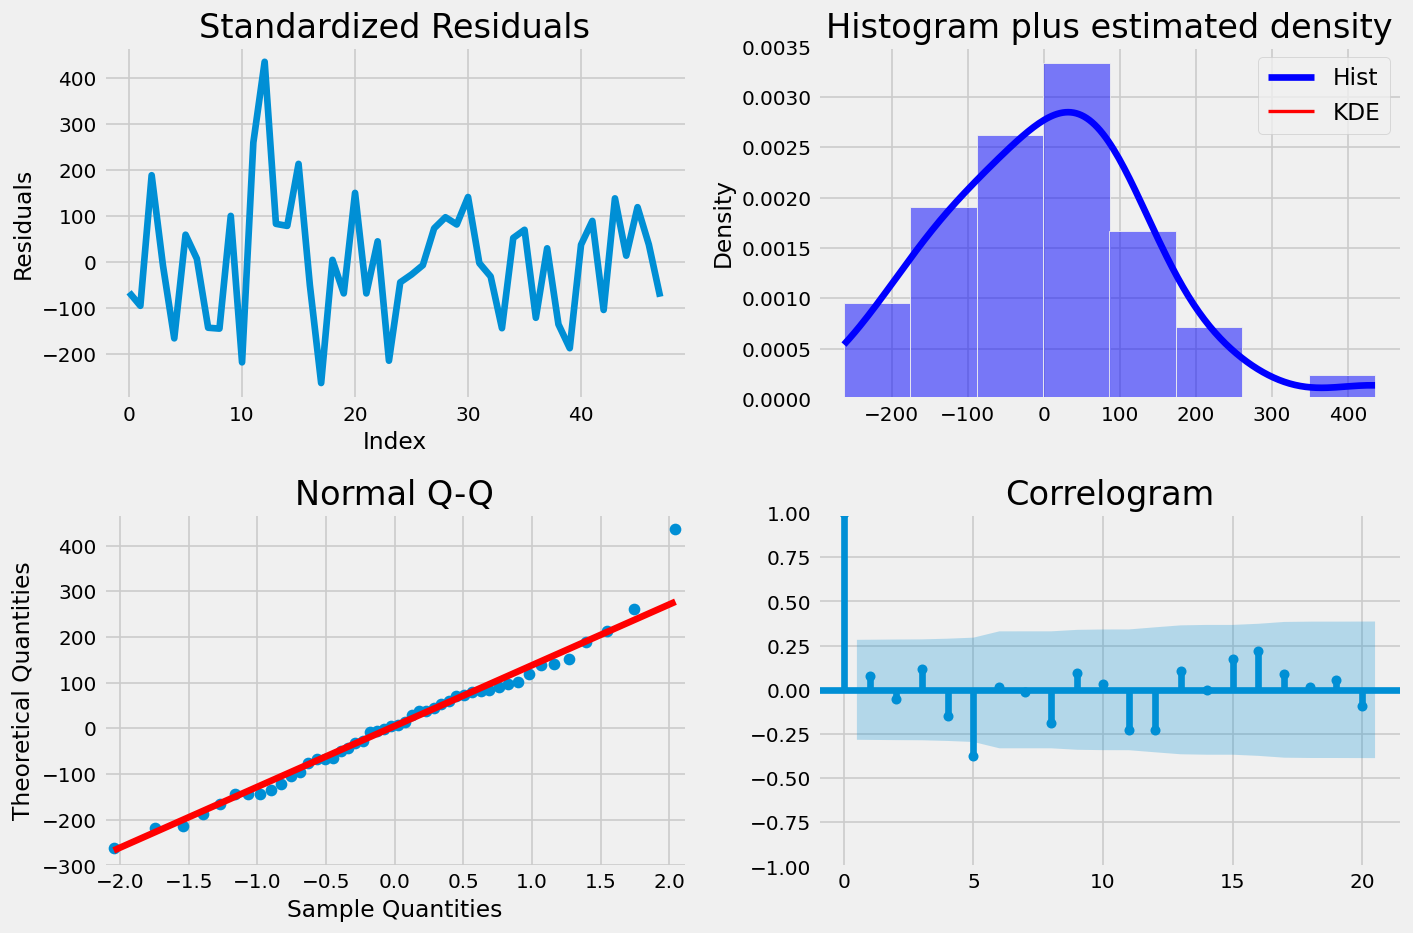

In [287]:
# Qalıqları hesablayın

y_true = y['y']  # Hədəf dəyərləri (faktiki dəyərlər)
y_pred = forecast['yhat1'][:len(y['y'])]  # Proqnozlaşdırılan dəyərlər

residuals = y_true - y_pred

import seaborn as sns

# Vizualizasiya üçün tərtibat
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# 1. Standartlaşdırılmış qalıqlar
axs[0, 0].plot(residuals)
axs[0, 0].set_title('Standardized Residuals')
axs[0, 0].set_xlabel('Index')
axs[0, 0].set_ylabel('Residuals')

# 2. Histogram və KDE
sns.histplot(residuals, kde=True, ax=axs[0, 1], stat='density', color='blue')
axs[0, 1].set_title('Histogram plus estimated density')
axs[0, 1].axhline(0, color='red', lw=2)
axs[0, 1].legend(['Hist', 'KDE'])

# 3. Q-Q Plot
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(residuals, line='s', ax=axs[1, 0])  # line='s' xətdə qırmızı xətt çəkmək üçündür
axs[1, 0].set_title('Normal Q-Q')
axs[1, 0].set_xlabel('Sample Quantities')
axs[1, 0].set_ylabel('Theoretical Quantities')
plt.grid(True)


# 4. Korrelogram
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, ax=axs[1, 1], lags=20)
axs[1, 1].set_title('Correlogram')

plt.tight_layout()
plt.show()

### 1. Her Epoch ucun Modelin təlimi zamanı performans ölçülərini əldə etmək:

In [288]:
pd.DataFrame({'real': y_true, 'pred': y_pred, 'diff': y_true-y_pred}).head()

real        pred        diff
0  480.194231  545.723022  -65.528792
1  367.931600  462.874542  -94.942942
2  857.291529  668.254517  189.037013
3  567.488357  574.639282   -7.150925
4  432.049188  597.762573 -165.713386

In [289]:
# Her Epoch ucun Təlim prosesinin metriklərini əldə etmək
train_metrics = metrics
print(train_metrics)

    train_loss  reg_loss         MAE        RMSE      Loss  RegLoss  epoch
0     0.440120       0.0  734.931946  947.162354  0.440120      0.0      0
1     0.364792       0.0  644.093140  844.966064  0.364792      0.0      1
2     0.280088       0.0  532.633911  693.377136  0.280088      0.0      2
3     0.182376       0.0  387.185272  521.424255  0.182376      0.0      3
4     0.117224       0.0  290.825043  389.195679  0.117224      0.0      4
5     0.113661       0.0  274.592926  326.012299  0.113661      0.0      5
6     0.079997       0.0  218.210861  244.803116  0.079997      0.0      6
7     0.062218       0.0  197.057755  241.737015  0.062218      0.0      7
8     0.077632       0.0  211.735840  241.779739  0.077632      0.0      8
9     0.137939       0.0  290.768402  348.892303  0.137939      0.0      9
10    0.116616       0.0  288.636566  328.471588  0.116616      0.0     10
11    0.095492       0.0  239.717392  288.027496  0.095492      0.0     11
12    0.112049       0.0 

### 2. Son nəticə olaraq tək bir metrik (MAE və ya MSE) əldə etmək:

In [290]:
# Metrikləri çıxarmaq
final_mae = metrics['MAE'].values[-1]  # MAE dəyərinin sonuncu iterasiyasını əldə edir
final_rmse = metrics['RMSE'].values[-1]  # MSE dəyərinin sonuncu iterasiyasını əldə edir

# Metrikləri çap etmək
print(f"Final MAE: {final_mae}")
print(f"Final RMSE: {final_rmse}")

Final MAE: 104.1773681640625
Final RMSE: 128.72862243652344


### 3. Proqnozdan sonra metrikləri əldə etmək:

In [291]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

# MAE və MSE hesablamaq üçün faktiki dəyərlər və proqnozlar
y_true = y['y']  # Hədəf dəyərləri (faktiki dəyərlər)
y_pred = forecast['yhat1'][:len(y['y'])]  # Proqnozlaşdırılan dəyərlər

# Performans metriklərini hesablayın
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = root_mean_squared_error(y_true, y_pred)

# Metrikləri göstərin
print(f"R2 {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMAE: {rmse}")

R2 0.8078118992007288
MAE: 104.02852667373742
MSE: 17721.52393407461
RMAE: 133.12221427723702


### Real predict

In [296]:
forecast[forecast['ds']>='2018']

ds   y        yhat1       trend  season_yearly
48 2018-01-01 NaN   549.687439  796.715454    -247.028076
49 2018-02-01 NaN   483.535217  797.257568    -313.722382
50 2018-03-01 NaN   704.329590  797.747192     -93.417572
51 2018-04-01 NaN   627.494629  798.289307    -170.794678
52 2018-05-01 NaN   666.831421  798.813843    -131.982422
53 2018-06-01 NaN   721.370911  799.355957     -77.985023
54 2018-07-01 NaN   696.031006  799.880493    -103.849556
55 2018-08-01 NaN   699.417603  800.422607    -101.004997
56 2018-09-01 NaN  1223.753662  800.964722     422.788910
57 2018-10-01 NaN   743.191895  801.489258     -58.297344